In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
from datetime import datetime

In [ ]:
current_date =datetime.now()
start_date= datetime(current_date.year-1, current_date.month, current_date.day)

In [ ]:
dfscrip = [['MSFT','Microsoft'],['TSLA','Tesla'],['GOOG','Google'],['MRSN','Mersana Ther'],['ARCT','Arcturus Ther'],['ATHA','Athira Pharma']]
dfscrip = pd.DataFrame(dfscrip, columns=['Symbol','Name'])
dfscrip

In [ ]:
x= pd.merge(dfscrip, df, left_on='Symbol', right_on='Ticker', how='left')
x= x[x['Close'].isnull()]
x1 = x.iloc[:,:12]
x1.sample(3)
x1.to_csv('symbols_cleansed.csv', index=False)

[*********             19%%                      ]  1569 of 8049 completed

In [122]:
#https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset?resource=download

#dfscrip = pd.read_csv('symbols_valid_meta.csv')
dfscrip = pd.read_csv('symbols_cleansed2.csv')
print('Total script count -' , len(dfscrip))
dfscrip.sample(3)

Total script count - 5793


,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF_x,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares,ETF_y
4382,Y,RJF,"Raymond James Financial, Inc. Common Stock",N,,N,100.0,N,NaN,RJF,RJF,N,NaN
71,Y,ADTN,"ADTRAN, Inc. - Common Stock",Q,Q,N,100.0,N,N,NaN,ADTN,N,NaN
3369,Y,MMSI,"Merit Medical Systems, Inc. - Common Stock",Q,Q,N,100.0,N,N,NaN,MMSI,N,NaN


In [124]:
# Define the start and end dates
start_date = '2022-01-01'
end_date = datetime.now() #'2024-03-05'

def first_business_day(date):
    if date.month == 1 and date.day == 1:
      date += pd.offsets.BDay()
    if date.weekday() >= 5:  # If it's Saturday (5) or Sunday (6)
        date += pd.offsets.BDay()
    return date

first_of_month = pd.date_range(start=start_date, end=end_date, freq='MS')

firstbdaylist = []
for dt in first_of_month:
    firstbdaylist.append(first_business_day(dt))

#add today as well
#firstbdaylist.append(pd.Timestamp(datetime.now().date()))
print('number of dates - ' , len(firstbdaylist))
firstbdaylist

number of dates -  32


[Timestamp('2022-01-03 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-02 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-10-03 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-01-02 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-01 00:00:00'),
 Timestamp('2023-04-03 00:00:00'),
 Timestamp('2023-05-01 00:00:00'),
 Timestamp('2023-06-01 00:00:00'),
 Timestamp('2023-07-03 00:00:00'),
 Timestamp('2023-08-01 00:00:00'),
 Timestamp('2023-09-01 00:00:00'),
 Timestamp('2023-10-02 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-01-02 00:00:00'),
 Timestamp('2024-02-01 00:00:00'),
 Timestamp('2024-03-01 00:00:00'),
 Timestamp('2024-04-01 00:00:00'),
 Timestamp('2024-05-

In [125]:
df_list=[]
for dt in firstbdaylist:
    df = yf.download(dfscrip['Symbol'].tolist(), dt , dt + pd.DateOffset(days=1))
    df_list.append(df)

df2 = pd.concat(df_list)
df2.sample(2)

[*****************     36%%                      ]  2080 of 5793 completed

$EW: possibly delisted; No price data found  (1d 2022-01-03 00:00:00 -> 2022-01-04 00:00:00)


[**********************55%%                      ]  3168 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2022-01-03 00:00:00 -> 2022-01-04 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
51 Failed downloads:
ERROR:yfinance:['SDRL', 'DBD', 'ECCX', 'PPEM', 'MNR', 'INOV', 'SUNS', 'XONE', 'AAMC', 'FDIV', 'NESR', 'KNOW', 'WTIU', 'IRET', 'LB', 'GDVD', 'LANDP', 'TDI', 'VAPO', 'LAC', 'INTL', 'SCAP', 'BAM', 'LTM', 'CR', 'GV', 'CAPE', 'DO', 'EMCG', 'PRH', 'ETH', 'ICON', 'GAINL', 'FG', 'EE', 'INFR', 'ELC', 'MAGS', 'XPER', 'DUKH', 'FLOW', 'SPAQ', 'GSC', 'IDXG', 'SONG', 'BHVN', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1641186000, endDate = 1641272400")
ERROR:yfinance:['EW', 'WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2022-01-03 00:00:00 -> 2022-01-04 00:00:00)')
[**********************55%%                      ]  3170 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2022-02-01 00:00:00 -> 2022-02-02 00:00:00)


[**********************60%%***                   ]  3470 of 5793 completed

$MUX: possibly delisted; No price data found  (1d 2022-02-01 00:00:00 -> 2022-02-02 00:00:00)


[**********************74%%**********            ]  4261 of 5793 completed

$MLPB: possibly delisted; No price data found  (1d 2022-02-01 00:00:00 -> 2022-02-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
51 Failed downloads:
ERROR:yfinance:['SDRL', 'DBD', 'ECCX', 'PPEM', 'MNR', 'INOV', 'SUNS', 'XONE', 'AAMC', 'FDIV', 'NESR', 'KNOW', 'WTIU', 'IRET', 'LB', 'GDVD', 'LANDP', 'TDI', 'VAPO', 'LAC', 'INTL', 'SCAP', 'BAM', 'LTM', 'CR', 'GV', 'CAPE', 'DO', 'EMCG', 'PRH', 'ETH', 'ICON', 'GAINL', 'FG', 'EE', 'INFR', 'MAGS', 'XPER', 'DUKH', 'FLOW', 'SPAQ', 'GSC', 'IDXG', 'SONG', 'BHVN', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1643691600, endDate = 1643778000")
ERROR:yfinance:['WSTL', 'MUX', 'MLPB']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2022-02-01 00:00:00 -> 2022-02-02 00:00:00)')
[**********************55%%                      ]  3169 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2022-03-01 00:00:00 -> 2022-03-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
48 Failed downloads:
ERROR:yfinance:['ICON', 'SDRL', 'DBD', 'PPEM', 'MNR', 'INOV', 'SUNS', 'XONE', 'AAMC', 'FDIV', 'NESR', 'KNOW', 'WTIU', 'IRET', 'LB', 'GDVD', 'LANDP', 'TDI', 'VAPO', 'LAC', 'INTL', 'SCAP', 'BAM', 'LTM', 'CR', 'GV', 'CAPE', 'DO', 'EMCG', 'PRH', 'ETH', 'GAINL', 'FG', 'EE', 'INFR', 'MAGS', 'XPER', 'DUKH', 'FLOW', 'SPAQ', 'GSC', 'IDXG', 'SONG', 'BHVN', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1646110800, endDate = 1646197200")
ERROR:yfinance:['WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2022-03-01 00:00:00 -> 2022-03-02 00:00:00)')
[**********************55%%                      ]  3168 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2022-04-01 00:00:00 -> 2022-04-02 00:00:00)


[**********************74%%**********            ]  4297 of 5793 completed

$FDRR: possibly delisted; No price data found  (1d 2022-04-01 00:00:00 -> 2022-04-02 00:00:00)


[**********************84%%**************        ]  4843 of 5793 completed

$IJUL: possibly delisted; No price data found  (1d 2022-04-01 00:00:00 -> 2022-04-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
47 Failed downloads:
ERROR:yfinance:['SDRL', 'DBD', 'PPEM', 'MNR', 'INOV', 'SUNS', 'XONE', 'FDIV', 'NESR', 'KNOW', 'WTIU', 'IRET', 'LB', 'LANDP', 'TDI', 'VAPO', 'LAC', 'INTL', 'SCAP', 'BAM', 'LTM', 'CR', 'GV', 'CAPE', 'EMCG', 'PRH', 'ETH', 'ICON', 'GAINL', 'FG', 'EE', 'INFR', 'MAGS', 'XPER', 'DUKH', 'FLOW', 'SPAQ', 'GSC', 'IDXG', 'SONG', 'BHVN', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1648785600, endDate = 1648872000")
ERROR:yfinance:['WSTL', 'FDRR', 'IJUL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2022-04-01 00:00:00 -> 2022-04-02 00:00:00)')
[**********************55%%                      ]  3171 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2022-05-02 00:00:00 -> 2022-05-03 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
43 Failed downloads:
ERROR:yfinance:['SDRL', 'DBD', 'PPEM', 'MNR', 'INOV', 'SUNS', 'XONE', 'FDIV', 'NESR', 'KNOW', 'WTIU', 'IRET', 'LB', 'LANDP', 'TDI', 'VAPO', 'LAC', 'INTL', 'SCAP', 'BAM', 'LTM', 'CR', 'GV', 'EMCG', 'PRH', 'ETH', 'ICON', 'GAINL', 'FG', 'INFR', 'MAGS', 'XPER', 'DUKH', 'FLOW', 'SPAQ', 'GSC', 'IDXG', 'SONG', 'BHVN', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1651464000, endDate = 1651550400")
ERROR:yfinance:['WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2022-05-02 00:00:00 -> 2022-05-03 00:00:00)')
[**********************54%%                      ]  3120 of 5793 completed

$NVR: possibly delisted; No price data found  (1d 2022-06-01 00:00:00 -> 2022-06-02 00:00:00)


[**********************55%%                      ]  3171 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2022-06-01 00:00:00 -> 2022-06-02 00:00:00)


[**********************75%%**********            ]  4348 of 5793 completed

$XLSR: possibly delisted; No price data found  (1d 2022-06-01 00:00:00 -> 2022-06-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
44 Failed downloads:
ERROR:yfinance:['SDRL', 'DBD', 'PPEM', 'MNR', 'INOV', 'SUNS', 'XONE', 'FDIV', 'NESR', 'KNOW', 'WTIU', 'IRET', 'LB', 'LANDP', 'TDI', 'VAPO', 'LAC', 'INTL', 'SCAP', 'BAM', 'LTM', 'CR', 'EMCG', 'PRH', 'ETH', 'ICON', 'GAINL', 'FG', 'INFR', 'MAGS', 'XPER', 'DUKH', 'FLOW', 'SPAQ', 'GSC', 'IDXG', 'SONG', 'BHVN', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1654056000, endDate = 1654142400")
ERROR:yfinance:['NVR', 'WSTL', 'XLSR']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2022-06-01 00:00:00 -> 2022-06-02 00:00:00)')
[**********************55%%                      ]  3170 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2022-07-01 00:00:00 -> 2022-07-02 00:00:00)


[**********************56%%*                     ]  3260 of 5793 completed

$SBT: possibly delisted; No price data found  (1d 2022-07-01 00:00:00 -> 2022-07-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
43 Failed downloads:
ERROR:yfinance:['SDRL', 'DBD', 'PPEM', 'MNR', 'INOV', 'SUNS', 'XONE', 'FDIV', 'NESR', 'KNOW', 'WTIU', 'IRET', 'LB', 'LANDP', 'TDI', 'VAPO', 'LAC', 'INTL', 'SCAP', 'BAM', 'LTM', 'CR', 'EMCG', 'PRH', 'ETH', 'ICON', 'GAINL', 'FG', 'INFR', 'MAGS', 'XPER', 'DUKH', 'FLOW', 'SPAQ', 'GSC', 'IDXG', 'SONG', 'BHVN', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1656648000, endDate = 1656734400")
ERROR:yfinance:['WSTL', 'SBT']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2022-07-01 00:00:00 -> 2022-07-02 00:00:00)')
[**************        29%%                      ]  1683 of 5793 completed

$OTLK: possibly delisted; No price data found  (1d 2022-08-01 00:00:00 -> 2022-08-02 00:00:00)


[**********************55%%                      ]  3170 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2022-08-01 00:00:00 -> 2022-08-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
43 Failed downloads:
ERROR:yfinance:['SDRL', 'DBD', 'PPEM', 'MNR', 'INOV', 'SUNS', 'XONE', 'FDIV', 'NESR', 'KNOW', 'WTIU', 'IRET', 'LB', 'LANDP', 'TDI', 'VAPO', 'LAC', 'INTL', 'SCAP', 'BAM', 'LTM', 'CR', 'EMCG', 'PRH', 'ETH', 'ICON', 'GAINL', 'FG', 'INFR', 'MAGS', 'XPER', 'DUKH', 'FLOW', 'SPAQ', 'GSC', 'IDXG', 'SONG', 'BHVN', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1659326400, endDate = 1659412800")
ERROR:yfinance:['OTLK', 'WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2022-08-01 00:00:00 -> 2022-08-02 00:00:00)')
[**********************55%%                      ]  3171 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2022-09-01 00:00:00 -> 2022-09-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
40 Failed downloads:
ERROR:yfinance:['FLOW', 'SDRL', 'DBD', 'PPEM', 'MNR', 'INOV', 'SUNS', 'XONE', 'FDIV', 'NESR', 'KNOW', 'WTIU', 'IRET', 'LB', 'LANDP', 'TDI', 'VAPO', 'LAC', 'INTL', 'SCAP', 'BAM', 'LTM', 'CR', 'EMCG', 'ETH', 'ICON', 'GAINL', 'FG', 'INFR', 'MAGS', 'XPER', 'DUKH', 'SPAQ', 'GSC', 'IDXG', 'BHVN', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1662004800, endDate = 1662091200")
ERROR:yfinance:['WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2022-09-01 00:00:00 -> 2022-09-02 00:00:00)')
[**********************55%%                      ]  3169 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2022-10-03 00:00:00 -> 2022-10-04 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
36 Failed downloads:
ERROR:yfinance:['SDRL', 'DBD', 'PPEM', 'MNR', 'INOV', 'SUNS', 'FDIV', 'KNOW', 'WTIU', 'IRET', 'LB', 'LANDP', 'TDI', 'VAPO', 'LAC', 'INTL', 'SCAP', 'BAM', 'LTM', 'CR', 'ETH', 'ICON', 'GAINL', 'FG', 'INFR', 'MAGS', 'DUKH', 'FLOW', 'SPAQ', 'GSC', 'IDXG', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1664769600, endDate = 1664856000")
ERROR:yfinance:['NESR']: ChunkedEncodingError(ProtocolError("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read)))
ERROR:yfinance:['WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2022-10-03 00:00:00 -> 2022-10-04 00:00:00)')
[******************    37%%                      ]  2153 of 5793 completed

$NORW: possibly delisted; No price data found  (1d 2022-11-01 00:00:00 -> 2022-11-02 00:00:00)


[**********************55%%                      ]  3169 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2022-11-01 00:00:00 -> 2022-11-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
36 Failed downloads:
ERROR:yfinance:['DBD', 'PPEM', 'MNR', 'INOV', 'SUNS', 'FDIV', 'NESR', 'KNOW', 'WTIU', 'IRET', 'LB', 'LANDP', 'TDI', 'VAPO', 'LAC', 'INTL', 'SCAP', 'BAM', 'LTM', 'CR', 'ETH', 'ICON', 'GAINL', 'FG', 'INFR', 'MAGS', 'DUKH', 'FLOW', 'SPAQ', 'GSC', 'IDXG', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1667275200, endDate = 1667361600")
ERROR:yfinance:['NORW', 'WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2022-11-01 00:00:00 -> 2022-11-02 00:00:00)')
[**********************55%%                      ]  3170 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2022-12-01 00:00:00 -> 2022-12-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
33 Failed downloads:
ERROR:yfinance:['DBD', 'PPEM', 'MNR', 'INOV', 'SUNS', 'FDIV', 'NESR', 'KNOW', 'WTIU', 'IRET', 'LB', 'LANDP', 'TDI', 'VAPO', 'LAC', 'INTL', 'SCAP', 'LTM', 'CR', 'ETH', 'ICON', 'GAINL', 'INFR', 'MAGS', 'DUKH', 'FLOW', 'SPAQ', 'GSC', 'IDXG', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1669870800, endDate = 1669957200")
ERROR:yfinance:['WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2022-12-01 00:00:00 -> 2022-12-02 00:00:00)')
[                       0%%                      ]  5 of 5793 completed

$BRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DOG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VTIP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INSP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MYFW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARDC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       0%%                      ]  9 of 5793 completed

$TAIT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FIW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XSMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMLF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       0%%                      ]  14 of 5793 completed

$WU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$IVZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$UCTT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PBPB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IDHQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VFMV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

[                       0%%                      ]  18 of 5793 completed


$ZLAB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IOSP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       0%%                      ]  22 of 5793 completed

$REED: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VRP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DPG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PTCT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       0%%                      ]  26 of 5793 completed

$EGP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RFV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ADSK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGMH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       1%%                      ]  30 of 5793 completed

$ADI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OSS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MRNA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PID: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       1%%                      ]  35 of 5793 completed

$MYI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PNW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALSN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INBKZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       1%%                      ]  39 of 5793 completed

$FOVL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MXE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FXZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       1%%                      ]  44 of 5793 completed

$XELB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VMI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LCNB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$REGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NBHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       1%%                      ]  49 of 5793 completed

$WTMF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RDHL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TIPT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FXD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MEDS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       1%%                      ]  54 of 5793 completed

$MLP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DDLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UAE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TWIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LPCN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       1%%                      ]  58 of 5793 completed

$IMTM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HHS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCHH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       1%%                      ]  63 of 5793 completed

$ISTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BCX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VONE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PIPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STWD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       1%%                      ]  68 of 5793 completed

$PZT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RCB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ENTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BRBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HIMX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       1%%                      ]  72 of 5793 completed

$STG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LGL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       1%%                      ]  78 of 5793 completed

$AMG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LKOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TTOO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INFU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTAG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BLUE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       1%%                      ]  81 of 5793 completed

$RSF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BURL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MPB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[                       1%%                      ]  85 of 5793 completed

$CHKP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PEO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XTNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      2%%                      ]  90 of 5793 completed

$TENX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCVL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EQBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GHYB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ECH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      2%%                      ]  94 of 5793 completed

$YOLO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UBOT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NDSN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      2%%                      ]  99 of 5793 completed

$PACB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GSG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RELL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RCG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EFAS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      2%%                      ]  101 of 5793 completed

$CRAI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLAB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      2%%                      ]  105 of 5793 completed

$QURE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LOMA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MBNKP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALLO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      2%%                      ]  109 of 5793 completed

$VLGEA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TPOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NUE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$URTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      2%%                      ]  113 of 5793 completed

$GT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MNDO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IVOL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HTLF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      2%%                      ]  117 of 5793 completed

$KRNY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSCP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QTWO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EVN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      2%%                      ]  119 of 5793 completed

$GECC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HCKT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSCU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      2%%                      ]  124 of 5793 completed

$BANX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SBCF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QCRH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBTH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      2%%                      ]  129 of 5793 completed

$NRG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OCCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TNDM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ANSS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NODK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      2%%                      ]  132 of 5793 completed

$NOVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZIONO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$F: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      2%%                      ]  135 of 5793 completed

$BMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OLN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FRBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$VUSE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[*                      2%%                      ]  141 of 5793 completed

$ARI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BKE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HOLX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ILF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      3%%                      ]  146 of 5793 completed

$NOG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALTG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TNET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ILTB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      3%%                      ]  151 of 5793 completed

$CLB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNKO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EXG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DEUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      3%%                      ]  155 of 5793 completed

$FLCH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SSTK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WBIF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCHF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      3%%                      ]  159 of 5793 completed

$QQQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SRNE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HPE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TER: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      3%%                      ]  163 of 5793 completed

$MGY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BMI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HMC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CASY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      3%%                      ]  169 of 5793 completed

$SDRL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RGT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TACT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZBH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMCX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      3%%                      ]  173 of 5793 completed

$BSMP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SYK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CREX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WABC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      3%%                      ]  179 of 5793 completed

$IHY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SFIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RMCF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      3%%                      ]  184 of 5793 completed

$LSTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PETS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JOE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BYM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      3%%                      ]  188 of 5793 completed

$HES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NNBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UDEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SDEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      3%%                      ]  193 of 5793 completed

$XMLV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AROC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HIHO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CWS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      3%%                      ]  197 of 5793 completed

$DESP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ICSH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DBMF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*                      3%%                      ]  201 of 5793 completed

$RAAX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EPAM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QGEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$YYY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     4%%                      ]  205 of 5793 completed

$EMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACGL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SNES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INDY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     4%%                      ]  208 of 5793 completed

$RIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QSR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BDN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     4%%                      ]  212 of 5793 completed

$BBAX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LADR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KJAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NACP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     4%%                      ]  215 of 5793 completed

$ALLK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GMRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     4%%                      ]  220 of 5793 completed

$GGT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SKF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DRV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESGE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LFUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     4%%                      ]  224 of 5793 completed

$IIIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VTEB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     4%%                      ]  229 of 5793 completed

$PDBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BDC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGBA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCYX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     4%%                      ]  235 of 5793 completed

$FCPT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DNN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NCA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KRUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CARV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$REW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     4%%                      ]  237 of 5793 completed

$DIAX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EXC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IYG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     4%%                      ]  243 of 5793 completed

$MSVB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NZF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CCRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MQY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RCKY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     4%%                      ]  248 of 5793 completed

$ATXI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KNOP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GGAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GENC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GIGM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     4%%                      ]  252 of 5793 completed

$MCFT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KOS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPYV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DPST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     4%%                      ]  258 of 5793 completed

$PBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PBE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$YUMC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SDGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGNCM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VNO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     5%%                      ]  265 of 5793 completed

$ELTK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UNB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IVOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XNET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SFBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BPOPM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     5%%                      ]  270 of 5793 completed

$AIHS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SIGA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$B: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AAOI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VSH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     5%%                      ]  276 of 5793 completed

$CFG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DSU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EPI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ANIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SUSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MHK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     5%%                      ]  281 of 5793 completed

$RNP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BDCZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FOF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LEGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     5%%                      ]  285 of 5793 completed

$CVNA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UTSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTGP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CZNC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     5%%                      ]  289 of 5793 completed

$ACA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CPT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MDWD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATLO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     5%%                      ]  295 of 5793 completed

$FAB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RILYG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FXN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ISRG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ADVM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FXY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     5%%                      ]  298 of 5793 completed

$XLU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XHR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$HIFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$ACIU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     5%%                      ]  303 of 5793 completed

$TSBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CGW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DIVY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     5%%                      ]  307 of 5793 completed

$DOOO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TOK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLGB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$QTRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[**                     5%%                      ]  312 of 5793 completed

$ALLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HYHG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USSG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IDT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MQT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**                     5%%                      ]  318 of 5793 completed

$CBZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FBIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APTO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNGO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NWFL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MPWR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    6%%                      ]  324 of 5793 completed

$HII: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EML: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OMF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    6%%                      ]  328 of 5793 completed

$DRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EYE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BJK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DOW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BANFP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

[***                    6%%                      ]  332 of 5793 completed

$IX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$BLX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    6%%                      ]  337 of 5793 completed

$UJB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VIDI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INKM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    6%%                      ]  341 of 5793 completed

$FLNG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NFTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KOP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARCH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    6%%                      ]  346 of 5793 completed

$TELA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NWBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PREF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UBSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NWSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    6%%                      ]  351 of 5793 completed

$PCN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OMEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RVNC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XSHD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    6%%                      ]  355 of 5793 completed

$MYSZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MCHP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MKC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NEO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    6%%                      ]  359 of 5793 completed

$NFG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IQI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PCH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    6%%                      ]  363 of 5793 completed

$LKFN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MATX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VIOO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DRH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    6%%                      ]  369 of 5793 completed

$UEVM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ANTE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CPHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EQWL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALTS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    6%%                      ]  373 of 5793 completed

$NYMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LAZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PNBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MCY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    7%%                      ]  377 of 5793 completed

$YANG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ICHR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RFEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    7%%                      ]  381 of 5793 completed

$GJP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JPC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MOAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BAX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    7%%                      ]  386 of 5793 completed

$DWAW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CTBB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    7%%                      ]  391 of 5793 completed

$BDL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JRSH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BHB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MVT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SFY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    7%%                      ]  395 of 5793 completed

$CHCT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GRMN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UAPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BLKB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    7%%                      ]  399 of 5793 completed

$CPER: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TAIL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HPS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBCP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    7%%                      ]  404 of 5793 completed

$VXRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EVOL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MGIC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    7%%                      ]  408 of 5793 completed

$RCL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IDYA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    7%%                      ]  412 of 5793 completed

$LEA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HRTG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSWC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KMI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    7%%                      ]  415 of 5793 completed

$NICK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HAFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TDW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    7%%                      ]  418 of 5793 completed

$FL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TSEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    7%%                      ]  423 of 5793 completed

$MAV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WLDN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CPIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IUSB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QCOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    7%%                      ]  428 of 5793 completed

$TRP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BHFAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AOSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JPME: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLJH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***                    7%%                      ]  432 of 5793 completed

$VOXX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IEMG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AVGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RDCM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   8%%                      ]  435 of 5793 completed

$PNI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TEVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CIEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   8%%                      ]  440 of 5793 completed

$ABT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IEV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AFMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CERS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   8%%                      ]  444 of 5793 completed

$NTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MUE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AFLG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SZK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   8%%                      ]  448 of 5793 completed

$EMF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$REX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   8%%                      ]  453 of 5793 completed

$CVCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPTS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SITE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IXJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   8%%                      ]  458 of 5793 completed

$GDOT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMPY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RWO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DLY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NNVC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   8%%                      ]  462 of 5793 completed

$MRK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PAA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   8%%                      ]  466 of 5793 completed

$AMWD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MEAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UCIB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   8%%                      ]  470 of 5793 completed

$BWA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ING: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CBOE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TAK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   8%%                      ]  474 of 5793 completed

$AWF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JETS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLBZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DIS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   8%%                      ]  478 of 5793 completed

$NTGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INOD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMSF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   8%%                      ]  483 of 5793 completed

$QUAD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMCP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QNST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HRL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   8%%                      ]  486 of 5793 completed

$ARKG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EBIZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARCC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   9%%                      ]  493 of 5793 completed

$EWZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RSP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EFAD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$REZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   9%%                      ]  499 of 5793 completed

$DFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NATH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NUSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IWV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   9%%                      ]  504 of 5793 completed

$ACST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SVT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AEO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LTBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CXW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   9%%                      ]  509 of 5793 completed

$DNL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LNG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STRL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XLRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APOG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   9%%                      ]  514 of 5793 completed

$ADAP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSTL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KOMP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JQUA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RBB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   9%%                      ]  519 of 5793 completed

$HEQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NVRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VGT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HMST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VBF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   9%%                      ]  524 of 5793 completed

$MRSN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$THM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$UTF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VUZI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TCOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   9%%                      ]  528 of 5793 completed

$RDIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PCK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MUST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LHX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   9%%                      ]  533 of 5793 completed

$GRAM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SGMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ICCH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KEMQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   9%%                      ]  537 of 5793 completed

$CENTA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WISA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SIMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TECH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   9%%                      ]  540 of 5793 completed

$EXK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FDM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   9%%                      ]  544 of 5793 completed

$IVE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LEGH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSGS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****                   9%%                      ]  548 of 5793 completed

$VSTM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UCC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JSMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BWG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 10%%                      ]  551 of 5793 completed

$DYNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BNO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 10%%                      ]  556 of 5793 completed

$PIZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NVO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PCB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SWKH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 10%%                      ]  560 of 5793 completed

$OGE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AEP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBHE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MCS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 10%%                      ]  564 of 5793 completed

$ZCMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VRNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LGIH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ETY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 10%%                      ]  568 of 5793 completed

$VLUE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TCBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 10%%                      ]  573 of 5793 completed

$CACI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BKR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EHTH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBKR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 10%%                      ]  577 of 5793 completed

$SMTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GDDY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MVV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JBL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 10%%                      ]  582 of 5793 completed

$MAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SRS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SBLK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$TENB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[*****                 10%%                      ]  587 of 5793 completed

$LMNR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HEWJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FBND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EEMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRIM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 10%%                      ]  591 of 5793 completed

$WCLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JQC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 10%%                      ]  594 of 5793 completed

$DGICB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IXP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 10%%                      ]  597 of 5793 completed

$SPTN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NNN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 10%%                      ]  602 of 5793 completed

$XTN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UIVM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RHE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LOPE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IMTE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 10%%                      ]  607 of 5793 completed

$HNI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LKQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NYCB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 11%%                      ]  612 of 5793 completed

$VTVT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WHR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CELH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RYLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$REET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSJO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

[*****                 11%%                      ]  616 of 5793 completed


$CVS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IWP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 11%%                      ]  621 of 5793 completed

$FTAI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$CSGP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$PTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NRUC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 11%%                      ]  625 of 5793 completed

$GVIP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DSWL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$X: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PDEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 11%%                      ]  628 of 5793 completed

$ENSG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TPIC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BKH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 11%%                      ]  632 of 5793 completed

$OTTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MNTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 11%%                      ]  637 of 5793 completed

$LZB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NREF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HYMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IJJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UVXY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 11%%                      ]  641 of 5793 completed

$MCN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RPD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KINS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 11%%                      ]  644 of 5793 completed

$OMFL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ICE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 11%%                      ]  649 of 5793 completed

$FDG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APVO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GDS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SGRP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 11%%                      ]  653 of 5793 completed

$BCC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TGEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLYA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 11%%                      ]  658 of 5793 completed

$D: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DGRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IMMR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BHK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****                 11%%                      ]  662 of 5793 completed

$VCNX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IRM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BKLN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                12%%                      ]  667 of 5793 completed

$AEG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPHB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ECCX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AFK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TMQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                12%%                      ]  671 of 5793 completed

$BBJP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LUNA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NXJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SOI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JBLU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                12%%                      ]  677 of 5793 completed

$EVX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QQQE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TYG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FCTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                12%%                      ]  682 of 5793 completed

$CVX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VEU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VOC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                12%%                      ]  687 of 5793 completed

$KNX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JWN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STRS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GIB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NBTB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                12%%                      ]  692 of 5793 completed

$GRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EBTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RDOG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DENN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DUOT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TBLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                12%%                      ]  698 of 5793 completed

$DTIL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VIG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RCM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SQLV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HMNF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                12%%                      ]  702 of 5793 completed

$MSEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARKR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OESX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                12%%                      ]  706 of 5793 completed

$AMKR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STAA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IMAX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                12%%                      ]  710 of 5793 completed

$BAH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DDOG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BPMC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                12%%                      ]  715 of 5793 completed

$LTRPA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPLV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ENOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MMU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                12%%                      ]  720 of 5793 completed

$PWR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RGNX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STBA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VNCE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EEMX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                13%%                      ]  725 of 5793 completed

$HOFT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRFZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MSCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SYNA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                13%%                      ]  729 of 5793 completed

$RYN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NOC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UPWK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EVER: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                13%%                      ]  732 of 5793 completed

$PTN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MVBF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                13%%                      ]  737 of 5793 completed

$GWRS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GWW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GWX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STKL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                13%%                      ]  742 of 5793 completed

$BBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PACK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CEV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VVR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VERO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                13%%                      ]  746 of 5793 completed

$TOTL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CIB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IQDY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                13%%                      ]  750 of 5793 completed

$VSDA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UXIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$PGX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$KOCT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                13%%                      ]  755 of 5793 completed

$IUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AXL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$AMGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$AIQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                13%%                      ]  761 of 5793 completed

$FQAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MOO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XRAY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NOMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AFYA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TALO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                13%%                      ]  768 of 5793 completed

$SAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AEIS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FSTA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GBIL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HRZN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SILK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VERU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                13%%                      ]  772 of 5793 completed

$PSP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UEIC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                13%%                      ]  775 of 5793 completed

$AVNS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VIOG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HSY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******                13%%                      ]  781 of 5793 completed

$SNDX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WHG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PGEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SASR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               14%%                      ]  784 of 5793 completed

$STRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMPL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               14%%                      ]  789 of 5793 completed

$USO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HYT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COHR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UPS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CWEB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               14%%                      ]  792 of 5793 completed

$TTWO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CWI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               14%%                      ]  796 of 5793 completed

$GOGL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHSCM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               14%%                      ]  801 of 5793 completed

$LDP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BOCT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$URG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGIC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLVO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               14%%                      ]  804 of 5793 completed

$KBWD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATHM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EFV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               14%%                      ]  807 of 5793 completed

$SPDW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GAMR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AZUL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               14%%                      ]  812 of 5793 completed

$DCF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DBEF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GRFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RICK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               14%%                      ]  815 of 5793 completed

$NGG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EXR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FFBW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               14%%                      ]  819 of 5793 completed

$TPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UYG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MMLP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SJB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               14%%                      ]  823 of 5793 completed

$SSKN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$FTS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$MFUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               14%%                      ]  829 of 5793 completed

$AXTA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MDIA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EPOL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VONG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               14%%                      ]  834 of 5793 completed

$IROQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AFGC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARLO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARDS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IWL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               14%%                      ]  838 of 5793 completed

$OVBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NXC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CBL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               15%%                      ]  842 of 5793 completed

$AREC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BGX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QRTEA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MSFT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               15%%                      ]  846 of 5793 completed

$IDLV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RBCAA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALLE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               15%%                      ]  850 of 5793 completed

$FRPT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SHV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               15%%                      ]  854 of 5793 completed

$HAE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$THFF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HAIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ABIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               15%%                      ]  858 of 5793 completed

$GMED: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PEG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LEG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               15%%                      ]  861 of 5793 completed

$VIXM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RPAY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               15%%                      ]  865 of 5793 completed

$FVD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MMIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PCYO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RSSS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               15%%                      ]  869 of 5793 completed

$TBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CVU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CEF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               15%%                      ]  873 of 5793 completed

$VV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NUW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VCEL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BWXT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               15%%                      ]  877 of 5793 completed

$VHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FDIS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GAIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PINE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               15%%                      ]  881 of 5793 completed

$NCTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PIM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CKX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SONO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               15%%                      ]  886 of 5793 completed

$AY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$HWC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$SPUU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INSW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               15%%                      ]  890 of 5793 completed

$TMHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VVI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CCK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CCL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******               15%%                      ]  894 of 5793 completed

$HSCZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AVXL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SDS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTXN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              16%%                      ]  899 of 5793 completed

$BATRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DDIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              16%%                      ]  904 of 5793 completed

$KEYS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNDA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BWX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ROIC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              16%%                      ]  909 of 5793 completed

$SCHA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FGD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRIB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CORP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              16%%                      ]  915 of 5793 completed

$COLB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBDP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FPI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CTMX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              16%%                      ]  921 of 5793 completed

$NERV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AFL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NCV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLCA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              16%%                      ]  925 of 5793 completed

$EIDO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DXLG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BRFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              16%%                      ]  930 of 5793 completed

$MAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ITI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IAK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RNST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WTFCM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              16%%                      ]  935 of 5793 completed

$DLX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NVMI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RPG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ORMP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              16%%                      ]  941 of 5793 completed

$GEVO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGSB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IVAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$POWI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CKPT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BKF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              16%%                      ]  945 of 5793 completed

$SEDG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XLF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              16%%                      ]  946 of 5793 completed

$STT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              16%%                      ]  950 of 5793 completed

$CLH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COPX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MMS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              16%%                      ]  953 of 5793 completed

$SCHG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EDIT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              17%%                      ]  957 of 5793 completed

$TEAF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACWV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              17%%                      ]  960 of 5793 completed

$PROV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HEZU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CII: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              17%%                      ]  964 of 5793 completed

$GUSH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KLIC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARGT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              17%%                      ]  968 of 5793 completed

$WING: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HUSV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ADM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MESA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              17%%                      ]  972 of 5793 completed

$SY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FSZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LIVE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FONR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              17%%                      ]  975 of 5793 completed

$IHAK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$SIJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$NINE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              17%%                      ]  982 of 5793 completed

$UDR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UFEB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RRBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VNQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              17%%                      ]  983 of 5793 completed

$UFCS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              17%%                      ]  987 of 5793 completed

$ELA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PWV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EGRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              17%%                      ]  992 of 5793 completed

$ABEO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BGFV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LVHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ROMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              17%%                      ]  997 of 5793 completed

$SPTI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLHY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VNLA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MASI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              17%%                      ]  1001 of 5793 completed

$UGP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RFIL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WSFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRVL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              17%%                      ]  1007 of 5793 completed

$AADR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VYMI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$PSTG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$PSNL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PULS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********              17%%                      ]  1011 of 5793 completed

$EYPT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNGS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBEU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DUST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             18%%                      ]  1015 of 5793 completed

$DWX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNRG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GRID: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSCE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             18%%                      ]  1020 of 5793 completed

$ATHE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NKX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FYT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BLMN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             18%%                      ]  1025 of 5793 completed

$MPC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IYLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LVHD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             18%%                      ]  1030 of 5793 completed

$JXI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPTM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SNCR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NGVT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             18%%                      ]  1034 of 5793 completed

$BLFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CEI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RFG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HSIC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             18%%                      ]  1038 of 5793 completed

$KEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPIP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GTHX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             18%%                      ]  1044 of 5793 completed

$BIS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JCPB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ELMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BOH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             18%%                      ]  1048 of 5793 completed

$DX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALRS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TELL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CDE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             18%%                      ]  1052 of 5793 completed

$BPT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PPTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESGG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             18%%                      ]  1055 of 5793 completed

$EVH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CAAS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             18%%                      ]  1057 of 5793 completed

$PSCD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             18%%                      ]  1062 of 5793 completed

$UBCP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DYNF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ICMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$ZTO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[*********             18%%                      ]  1066 of 5793 completed

$AMRK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BTG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MLN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             18%%                      ]  1070 of 5793 completed

$MD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LPTH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WILC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GTE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             19%%                      ]  1074 of 5793 completed

$WWJD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XLP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHNR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRGS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             19%%                      ]  1078 of 5793 completed

$OPI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GSK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLRB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IQSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             19%%                      ]  1083 of 5793 completed

$MSTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESML: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHGG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VBFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             19%%                      ]  1088 of 5793 completed

$UNIT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WEYS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$POAI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BOX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FPXE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             19%%                      ]  1093 of 5793 completed

$RMAX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DMDV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STKS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SNSR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             19%%                      ]  1098 of 5793 completed

$EB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MEIP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             19%%                      ]  1102 of 5793 completed

$TVE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NUEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SOHOB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NURE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SGBX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             19%%                      ]  1108 of 5793 completed

$MGRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OZK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PTEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPOK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZIONL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             19%%                      ]  1113 of 5793 completed

$PLMR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ONVO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ECOW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$THRM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PEXL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             19%%                      ]  1118 of 5793 completed

$RDY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UBX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FIXD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FULC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HONE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             19%%                      ]  1123 of 5793 completed

$OCFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DJCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASRV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********             19%%                      ]  1127 of 5793 completed

$XMPT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NTRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$ROK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$MGM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            20%%                      ]  1134 of 5793 completed

$FSMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PEJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QRHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IRTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LOW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            20%%                      ]  1140 of 5793 completed

$QRVO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CUBE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VOT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FCVT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ENTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            20%%                      ]  1144 of 5793 completed

$EFOI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DGT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IWS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            20%%                      ]  1148 of 5793 completed

$JUST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRWS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EDOW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USDP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            20%%                      ]  1152 of 5793 completed

$POLA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ENG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EQIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            20%%                      ]  1154 of 5793 completed

$CTSO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CPS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            20%%                      ]  1155 of 5793 completed

$KFY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            20%%                      ]  1160 of 5793 completed

$TTMI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SANW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ERJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BWZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            20%%                      ]  1165 of 5793 completed

$OXLCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ORAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EBMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PKOH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            20%%                      ]  1169 of 5793 completed

$AJX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HYGH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TREX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            20%%                      ]  1174 of 5793 completed

$ALTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KYN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACHV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XONE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ISCF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESPO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            20%%                      ]  1180 of 5793 completed

$BDEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CGNX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HDG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IART: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            20%%                      ]  1183 of 5793 completed

$EVM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IPGP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NVEE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            20%%                      ]  1186 of 5793 completed

$CULP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PCY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LOGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            21%%                      ]  1191 of 5793 completed

$REMX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NDRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SDCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            21%%                      ]  1196 of 5793 completed

$YXI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RCEL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSMQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COOP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            21%%                      ]  1202 of 5793 completed

$RILYN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NYT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PTF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GSLC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            21%%                      ]  1206 of 5793 completed

$THQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AIRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VTWG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            21%%                      ]  1209 of 5793 completed

$SAH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BCS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            21%%                      ]  1213 of 5793 completed

$PRGO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLBL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WEBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BDJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            21%%                      ]  1217 of 5793 completed

$SPVU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SSG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DDWM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JDST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            21%%                      ]  1222 of 5793 completed

$SHOO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRQR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SIVR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            21%%                      ]  1227 of 5793 completed

$FORR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NNDM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BCLI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            21%%                      ]  1233 of 5793 completed

$HVT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FPF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGGY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DCOMP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSCM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            21%%                      ]  1237 of 5793 completed

$SRLN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VLYPO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            21%%                      ]  1240 of 5793 completed

$VSS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BCD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MGA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********            21%%                      ]  1245 of 5793 completed

$EMTL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HWKN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CPRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MDGL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MATW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           22%%                      ]  1249 of 5793 completed

$UNH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MLM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EOG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           22%%                      ]  1254 of 5793 completed

$CMSD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SIM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CPRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WIT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OUSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           22%%                      ]  1257 of 5793 completed

$ARAY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INTF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           22%%                      ]  1261 of 5793 completed

$TARA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MLAB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ONCY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JNK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           22%%                      ]  1264 of 5793 completed

$SND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EPIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IEFA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           22%%                      ]  1269 of 5793 completed

$OVLY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AEFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SYLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLNO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           22%%                      ]  1274 of 5793 completed

$QQH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HFBL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CUE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BPYPN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QEMM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           22%%                      ]  1279 of 5793 completed

$WAFD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CWCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$PFFL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$NFJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           22%%                      ]  1284 of 5793 completed

$SEIC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DBEU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LSCC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CTBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NCLH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           22%%                      ]  1288 of 5793 completed

$MEXX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SREA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IXUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           22%%                      ]  1292 of 5793 completed

$THTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AEE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHDG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           22%%                      ]  1296 of 5793 completed

$BNDC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZYME: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMDV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HEES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           22%%                      ]  1301 of 5793 completed

$CP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NMIH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BIL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AIRR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           23%%                      ]  1306 of 5793 completed

$PAYC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EPP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TBT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LBTYA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           23%%                      ]  1308 of 5793 completed

$SHOP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ERY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           23%%                      ]  1311 of 5793 completed

$IBP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CCJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AJG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$NHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[***********           23%%                      ]  1316 of 5793 completed

$IONS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EEV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBDR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JRS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           23%%                      ]  1320 of 5793 completed

$UMH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IFN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLQS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           23%%                      ]  1324 of 5793 completed

$ARVN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KAI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DZZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LEVI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           23%%                      ]  1327 of 5793 completed

$VIVE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMMS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MUC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           23%%                      ]  1334 of 5793 completed

$XLB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VNOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PDN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLPT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PAPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SQNS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QVCD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           23%%                      ]  1339 of 5793 completed

$SMLV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PXH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JFIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BTE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ANAB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           23%%                      ]  1345 of 5793 completed

$DIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MELI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GVAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HCC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EUFN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           23%%                      ]  1349 of 5793 completed

$ICOW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMZA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IETC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$NFLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[***********           23%%                      ]  1357 of 5793 completed

$FARM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SRL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UONEK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NVST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESGRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***********           23%%                      ]  1361 of 5793 completed

$SLGL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VECO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DGRW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          24%%                      ]  1366 of 5793 completed

$CAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FDHY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UGA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UAMY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          24%%                      ]  1370 of 5793 completed

$CHTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$USAS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$EOT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SUZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          24%%                      ]  1374 of 5793 completed

$DRRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ICLN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ELLO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          24%%                      ]  1378 of 5793 completed

$EVFM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLPC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MKSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          24%%                      ]  1380 of 5793 completed

$BBSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GII: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          24%%                      ]  1384 of 5793 completed

$LYFT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMHB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TFFP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FAF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FDN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          24%%                      ]  1390 of 5793 completed

$PAG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZROZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RAPT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$REVS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          24%%                      ]  1394 of 5793 completed

$UUUU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RIGS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CCAP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          24%%                      ]  1399 of 5793 completed

$HDLB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GUNR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSWI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SYRS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$REKR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          24%%                      ]  1404 of 5793 completed

$ROM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XPL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BHP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XTLB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          24%%                      ]  1408 of 5793 completed

$FDX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARKQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          24%%                      ]  1414 of 5793 completed

$EHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$METC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGMS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FDD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TTNP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          24%%                      ]  1419 of 5793 completed

$SAM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UNP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SGH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MRGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WTS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          25%%                      ]  1423 of 5793 completed

$HTUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SEIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TPC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          25%%                      ]  1428 of 5793 completed

$BJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HSRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASUR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AAMC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          25%%                      ]  1431 of 5793 completed

$BBDC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UMC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MDLZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VGIT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

[************          25%%                      ]  1434 of 5793 completed


$FRME: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          25%%                      ]  1438 of 5793 completed

$MFDX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HLNE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AAON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FENC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          25%%                      ]  1443 of 5793 completed

$AMX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EDZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SAGE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CBON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FPXI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          25%%                      ]  1447 of 5793 completed

$GNLN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARMP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GDX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          25%%                      ]  1450 of 5793 completed

$GMAB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BKT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QDIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          25%%                      ]  1455 of 5793 completed

$IBMP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LIND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CTRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLPI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ENS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          25%%                      ]  1460 of 5793 completed

$FNF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EFA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PGC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          25%%                      ]  1464 of 5793 completed

$HUBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MARA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ENLV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BIP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          25%%                      ]  1468 of 5793 completed

$SNY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TSLX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LOB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          25%%                      ]  1472 of 5793 completed

$CMS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FFIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AVAV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AVUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          25%%                      ]  1476 of 5793 completed

$BRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BRBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          26%%                      ]  1480 of 5793 completed

$COLM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EUO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EFAX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BFAM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LCR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          26%%                      ]  1486 of 5793 completed

$BGY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IRBT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NAVI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          26%%                      ]  1489 of 5793 completed

$NTIP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLSD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TMP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          26%%                      ]  1493 of 5793 completed

$LGLV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HWBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NGL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DIT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          26%%                      ]  1499 of 5793 completed

$ENVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CUBB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BHLB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CZR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          26%%                      ]  1506 of 5793 completed

$SPYX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RUSHB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TNK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRVG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BLK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IIF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EXPI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          26%%                      ]  1511 of 5793 completed

$WTRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EUSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JKS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSCF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$K: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          26%%                      ]  1515 of 5793 completed

$DXF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GOVT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASHS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EPRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          26%%                      ]  1520 of 5793 completed

$PRDO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MMM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CAMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TVC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FFEB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          26%%                      ]  1525 of 5793 completed

$ESBA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PIRS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARCT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OCX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HOG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[************          26%%                      ]  1531 of 5793 completed

$FLAU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RVT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PXF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZIG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ISDR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         27%%                      ]  1536 of 5793 completed

$NOK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NTCT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMCL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RFDA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         27%%                      ]  1541 of 5793 completed

$GOOGL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FEP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IYY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NATR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLFD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         27%%                      ]  1544 of 5793 completed

$INCY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FMF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMXC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         27%%                      ]  1550 of 5793 completed

$MUJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ECL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ANIK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         27%%                      ]  1554 of 5793 completed

$MMYT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FSBW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$POOL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HIW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         27%%                      ]  1557 of 5793 completed

$BXMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLQD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALNY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FUL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         27%%                      ]  1562 of 5793 completed

$YLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLMI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPLP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XSLV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         27%%                      ]  1568 of 5793 completed

$Z: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CURE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLIR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EGBN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UFO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JCE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         27%%                      ]  1572 of 5793 completed

$SKT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SNOA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BANC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         27%%                      ]  1577 of 5793 completed

$PICB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACEL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ROKU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FMHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         27%%                      ]  1582 of 5793 completed

$OIS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UONE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FATE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TCMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPOT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         27%%                      ]  1587 of 5793 completed

$PBUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UIS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SXTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         27%%                      ]  1588 of 5793 completed

$FE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         27%%                      ]  1590 of 5793 completed

$MAS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         28%%                      ]  1595 of 5793 completed

$SRV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SGU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ORRF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         28%%                      ]  1601 of 5793 completed

$OSUR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APPS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STOT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CARG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RMI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         28%%                      ]  1607 of 5793 completed

$DORM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BRY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RVNU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JELD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         28%%                      ]  1613 of 5793 completed

$GBDC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GJO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTNB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BYD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SOXL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         28%%                      ]  1617 of 5793 completed

$EVG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TXRH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KGC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHSCL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AVUV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         28%%                      ]  1621 of 5793 completed

$WMS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PCTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESGD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         28%%                      ]  1626 of 5793 completed

$CIL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QCLN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PTH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DRIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LIQT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         28%%                      ]  1631 of 5793 completed

$ODC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CODX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ONEV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GSIE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         28%%                      ]  1636 of 5793 completed

$BLV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHUY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GIII: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IVR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FXC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         28%%                      ]  1638 of 5793 completed

$SWZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ABEQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*************         28%%                      ]  1643 of 5793 completed

$MED: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GCV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NTNX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$BSJQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[*************         28%%                      ]  1648 of 5793 completed

$GHSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AYI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SDP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BUG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KTN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        29%%                      ]  1654 of 5793 completed

$UUP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IEUR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CEE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BLE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLHK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        29%%                      ]  1657 of 5793 completed

$HQY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FCCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$YRD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        29%%                      ]  1663 of 5793 completed

$LEDS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RMBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GIFI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        29%%                      ]  1668 of 5793 completed

$USPH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CIZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DRSK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TTT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        29%%                      ]  1672 of 5793 completed

$CAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JMIA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FFTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        29%%                      ]  1675 of 5793 completed

$BFK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$CRM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[**************        29%%                      ]  1681 of 5793 completed

$PICK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AVTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JMBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OTLK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USIG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OMCL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        29%%                      ]  1683 of 5793 completed

$ENTG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DAX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        29%%                      ]  1689 of 5793 completed

$MHN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AVGO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RELV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AOK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        29%%                      ]  1694 of 5793 completed

$DXJS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SGC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BNGO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NTRSO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NAII: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        29%%                      ]  1697 of 5793 completed

$MTDR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XHB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NVS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        29%%                      ]  1701 of 5793 completed

$IZRL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SBH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FBZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HDV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        29%%                      ]  1705 of 5793 completed

$LMPX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        30%%                      ]  1710 of 5793 completed

$BNY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SIEB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BAUG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SJM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SZNE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        30%%                      ]  1715 of 5793 completed

$YINN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BAPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IRWD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EDV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QINT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        30%%                      ]  1720 of 5793 completed

$NAOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NBIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$VICI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$UTES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        30%%                      ]  1724 of 5793 completed

$LQDT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$OUSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$SDVY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZTS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        30%%                      ]  1729 of 5793 completed

$AMOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CIK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CTV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HUBG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        30%%                      ]  1733 of 5793 completed

$LDSF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FREL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GAA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RGLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        30%%                      ]  1734 of 5793 completed

$CNF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        30%%                      ]  1740 of 5793 completed

$FDEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NJAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHRS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        30%%                      ]  1744 of 5793 completed

$PDD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PUMP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AKRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        30%%                      ]  1749 of 5793 completed

$CGEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRTO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNWB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EPV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        30%%                      ]  1752 of 5793 completed

$ACAD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DTD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        30%%                      ]  1756 of 5793 completed

$SHAK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KALV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MRBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        30%%                      ]  1759 of 5793 completed

$NVCR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$URE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**************        30%%                      ]  1765 of 5793 completed

$IWM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PROF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ENR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LITB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RGCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       31%%                      ]  1769 of 5793 completed

$HIBL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BOTJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ICF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       31%%                      ]  1773 of 5793 completed

$EMGF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STCN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ADPT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       31%%                      ]  1776 of 5793 completed

$WWD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       31%%                      ]  1780 of 5793 completed

$GLYC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PKX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SIL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       31%%                      ]  1783 of 5793 completed

$HYB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BTT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UBER: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TEI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       31%%                      ]  1788 of 5793 completed

$BFOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BILI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AZPN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WVVI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       31%%                      ]  1792 of 5793 completed

$PIE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AKR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MYN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       31%%                      ]  1796 of 5793 completed

$BIDU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       31%%                      ]  1799 of 5793 completed

$RL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CDC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DHF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       31%%                      ]  1803 of 5793 completed

$KRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGBH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       31%%                      ]  1806 of 5793 completed

$EVI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USAI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       31%%                      ]  1810 of 5793 completed

$GAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MHH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UDN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PDFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       31%%                      ]  1815 of 5793 completed

$MRIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DSX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ITGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NPV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       31%%                      ]  1818 of 5793 completed

$TOWN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FGB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ELS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       31%%                      ]  1822 of 5793 completed

$INTU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SXC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WLDR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LSXMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       32%%                      ]  1827 of 5793 completed

$MUNI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BIOX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ITUB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KXIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SIZE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       32%%                      ]  1830 of 5793 completed

$FLJP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MRKR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UVV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       32%%                      ]  1834 of 5793 completed

$GCOW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HNNA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       32%%                      ]  1838 of 5793 completed

$EC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IXN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ELAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UVSP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       32%%                      ]  1842 of 5793 completed

$HTZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FVAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VBND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IHRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       32%%                      ]  1847 of 5793 completed

$CVV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KORU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HTRB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HOPE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IESC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       32%%                      ]  1851 of 5793 completed

$LPTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VGSH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KIE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TDIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       32%%                      ]  1854 of 5793 completed

$PII: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XLG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RWK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       32%%                      ]  1858 of 5793 completed

$ONTO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPXC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ITW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GPS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       32%%                      ]  1862 of 5793 completed

$PSMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ADP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EPAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EIM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       32%%                      ]  1866 of 5793 completed

$COHN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SILC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ECON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DLPN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       32%%                      ]  1871 of 5793 completed

$ETB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EEMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MARPS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       32%%                      ]  1875 of 5793 completed

$KALU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LQDI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[***************       32%%                      ]  1879 of 5793 completed

$OVV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGNCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSTE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      33%%                      ]  1884 of 5793 completed

$CUBA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COCP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LTL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DXYN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      33%%                      ]  1888 of 5793 completed

$EARN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PUK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HERD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      33%%                      ]  1893 of 5793 completed

$SBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DTH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HTAB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GTLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NQP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      33%%                      ]  1897 of 5793 completed

$MORT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VOO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      33%%                      ]  1901 of 5793 completed

$MCB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MDJH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFXF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JPSE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      33%%                      ]  1906 of 5793 completed

$WSBF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$PAM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$KORP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACNB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      33%%                      ]  1911 of 5793 completed

$IEZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BXC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FWRD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SVXY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLTM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      33%%                      ]  1916 of 5793 completed

$BHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EOS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MOTS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARTL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MDY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      33%%                      ]  1920 of 5793 completed

$KT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLOW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPXT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JLL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      33%%                      ]  1924 of 5793 completed

$CNBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MDT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INDO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JKHY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      33%%                      ]  1929 of 5793 completed

$CEVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IFRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DSGX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AKTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RVSB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      33%%                      ]  1934 of 5793 completed

$CLLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IQSU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BIB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QUIK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IUSG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      33%%                      ]  1939 of 5793 completed

$DECK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VSEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PGNY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WRLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      34%%                      ]  1942 of 5793 completed

$BGT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IIM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      34%%                      ]  1947 of 5793 completed

$PRMW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TEL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLVP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TREE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      34%%                      ]  1950 of 5793 completed

$NSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XSW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JHSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LAKE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      34%%                      ]  1955 of 5793 completed

$NSSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LSST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JFU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MFM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      34%%                      ]  1959 of 5793 completed

$TFSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BCH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGEB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRPO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      34%%                      ]  1963 of 5793 completed

$MSB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OUT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XEL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      34%%                      ]  1968 of 5793 completed

$HDSN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BTO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TMDX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VGLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      34%%                      ]  1972 of 5793 completed

$IHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AEZS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SALM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XLV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      34%%                      ]  1977 of 5793 completed

$FCAP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AUTL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XELA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ODP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FWONA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      34%%                      ]  1980 of 5793 completed

$IPOS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AME: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      34%%                      ]  1984 of 5793 completed

$GBX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FRAF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MBCN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      34%%                      ]  1987 of 5793 completed

$HUBB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSCS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      34%%                      ]  1990 of 5793 completed

$KEQU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FBP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QQXT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[****************      34%%                      ]  1995 of 5793 completed

$SCHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HEDJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MPLX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DDD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     35%%                      ]  2000 of 5793 completed

$GTIP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GAIA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CWEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PKE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     35%%                      ]  2002 of 5793 completed

$IHG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRVS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     35%%                      ]  2006 of 5793 completed

$CADE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XPH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ICLK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     35%%                      ]  2011 of 5793 completed

$TQQQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RXI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DLR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRESY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LRCX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     35%%                      ]  2015 of 5793 completed

$AMRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KBWB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IYR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     35%%                      ]  2023 of 5793 completed

$BSEP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HYGV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JMUB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TWST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ADIL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BWEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LNN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     35%%                      ]  2027 of 5793 completed

$SBB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCHO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PGHY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HEI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     35%%                      ]  2032 of 5793 completed

$CBAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MUB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BCV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VRNS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     35%%                      ]  2036 of 5793 completed

$BDRY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CXH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EFNL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ORGO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     35%%                      ]  2041 of 5793 completed

$BOSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EIRL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OKTA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SSSS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UNM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     35%%                      ]  2048 of 5793 completed

$KIDS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RING: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DWLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MPAA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FORM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VLRS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FIBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     35%%                      ]  2052 of 5793 completed

$FNV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QTUM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     35%%                      ]  2054 of 5793 completed

$RGLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NOAH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     36%%                      ]  2060 of 5793 completed

$AOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UAA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AOS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GENE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MOD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     36%%                      ]  2063 of 5793 completed

$AWI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NUSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     36%%                      ]  2068 of 5793 completed

$HP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRAA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCHK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EJAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     36%%                      ]  2073 of 5793 completed

$CVGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TSCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNDE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     36%%                      ]  2078 of 5793 completed

$EKSO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHSCN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QLVD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     36%%                      ]  2081 of 5793 completed

$EW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNCR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TFX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     36%%                      ]  2085 of 5793 completed

$HUN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LXU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PMX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TJX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     36%%                      ]  2090 of 5793 completed

$PESI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SOCL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TLTD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BERY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     36%%                      ]  2093 of 5793 completed

$FSEA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KMX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PED: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SJT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     36%%                      ]  2098 of 5793 completed

$SPLG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CIZN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PEZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMKR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ANET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     36%%                      ]  2103 of 5793 completed

$VET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RWX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALRM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FMBH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*****************     36%%                      ]  2110 of 5793 completed

$HBM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IQDG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FISI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GEO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GDVD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTEK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHGE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    37%%                      ]  2116 of 5793 completed

$BSBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UBT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NUDM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MLCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    37%%                      ]  2120 of 5793 completed

$CTRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BANR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESCA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DUSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    37%%                      ]  2124 of 5793 completed

$CAG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DHT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    37%%                      ]  2129 of 5793 completed

$PCAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GSSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMOG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ECOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SATS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    37%%                      ]  2135 of 5793 completed

$SBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSMS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MANH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FBT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DWM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DBVT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    37%%                      ]  2139 of 5793 completed

$IAE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PJAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TMFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EPSN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    37%%                      ]  2143 of 5793 completed

$SHIP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SBRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLDB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    37%%                      ]  2148 of 5793 completed

$NORW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBTI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPXX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OII: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EGHT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    37%%                      ]  2155 of 5793 completed

$PTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WDIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GOLF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NCNA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UCON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    37%%                      ]  2160 of 5793 completed

$HYDB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRVI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CANG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLNG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SDOG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    37%%                      ]  2165 of 5793 completed

$MTUM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ULTA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MLI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CGBD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    37%%                      ]  2169 of 5793 completed

$DAO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SSUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    38%%                      ]  2174 of 5793 completed

$BH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PAWZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WBND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    38%%                      ]  2179 of 5793 completed

$DVAX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KOSS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARTW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AQST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    38%%                      ]  2185 of 5793 completed

$JHG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RETL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BIT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WHLRP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPMV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    38%%                      ]  2190 of 5793 completed

$PNC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCHM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SOHU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QRTEB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HTIA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    38%%                      ]  2194 of 5793 completed

$TX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CBSH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$REXR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESGU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    38%%                      ]  2200 of 5793 completed

$FTXL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PDSB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NBB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PZG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SSBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    38%%                      ]  2205 of 5793 completed

$SMMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OBOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BOOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TPYP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PNF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    38%%                      ]  2209 of 5793 completed

$STIP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GVI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$THW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GEL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AIRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    38%%                      ]  2216 of 5793 completed

$EWX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WLFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RILYP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IWN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TIGO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    38%%                      ]  2222 of 5793 completed

$FEIM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TCON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UHT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PDEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TNXP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$J: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    38%%                      ]  2225 of 5793 completed

$TU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AWK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[******************    38%%                      ]  2230 of 5793 completed

$VBTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HGLB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BIMI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   39%%                      ]  2234 of 5793 completed

$MC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LOOP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FORTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   39%%                      ]  2240 of 5793 completed

$MHLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RYAM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GNL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FSV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PAGP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   39%%                      ]  2245 of 5793 completed

$ENLC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$REI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GYLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INDA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$R: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   39%%                      ]  2250 of 5793 completed

$TBPH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALTM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IPDN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EGF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BECN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   39%%                      ]  2254 of 5793 completed

$JEQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RLGT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GEF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NFBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   39%%                      ]  2260 of 5793 completed

$EHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VONV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PZA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SGRY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RLY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   39%%                      ]  2264 of 5793 completed

$TSN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HBAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DELL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TPZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   39%%                      ]  2268 of 5793 completed

$UTRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DWMF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RFI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OSIS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   39%%                      ]  2273 of 5793 completed

$NKSH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WBIY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MYO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CBNK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   39%%                      ]  2277 of 5793 completed

$UTMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UNF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KZR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   39%%                      ]  2282 of 5793 completed

$DOCU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JRVR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FORD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IQDF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   39%%                      ]  2286 of 5793 completed

$TBBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CIF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SFYF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SJNK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   40%%                      ]  2293 of 5793 completed

$MUSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BGNE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UBOH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HTBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$YY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASPS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   40%%                      ]  2297 of 5793 completed

$CWBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FALN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TKR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   40%%                      ]  2302 of 5793 completed

$EVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WORX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TEO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PTMC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KBWY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   40%%                      ]  2306 of 5793 completed

$EYLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$YTEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GGZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   40%%                      ]  2311 of 5793 completed

$KNG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EVOK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STAG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EXP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   40%%                      ]  2316 of 5793 completed

$BUYZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GRTS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FIVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STNG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   40%%                      ]  2320 of 5793 completed

$SCHP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IDEV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KNSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AHT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   40%%                      ]  2326 of 5793 completed

$SMN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GTO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMCB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   40%%                      ]  2327 of 5793 completed

$LYB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   40%%                      ]  2331 of 5793 completed

$BCBP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SSPY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JHML: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   40%%                      ]  2336 of 5793 completed

$TPSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SXT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NML: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARKF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   40%%                      ]  2341 of 5793 completed

$CCM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GAM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LASR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LSXMK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LMBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*******************   40%%                      ]  2346 of 5793 completed

$SMBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSVN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TNA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FAZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EDIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  41%%                      ]  2350 of 5793 completed

$SPAB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DNOW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$MORN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[********************  41%%                      ]  2354 of 5793 completed

$BCTF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FUNC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EZU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  41%%                      ]  2358 of 5793 completed

$ITOT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GVP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BCYC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  41%%                      ]  2363 of 5793 completed

$CPLP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IFRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DEI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SGMA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPHQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  41%%                      ]  2368 of 5793 completed

$TDTT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$A: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HYEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRTA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  41%%                      ]  2371 of 5793 completed

$VPG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SNPS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  41%%                      ]  2376 of 5793 completed

$JHMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MBRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SBAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OGIG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  41%%                      ]  2382 of 5793 completed

$LKCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PKB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EAST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FFNW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FEZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ILPT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  41%%                      ]  2387 of 5793 completed

$ARQT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LBRDA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GNTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SWAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  41%%                      ]  2391 of 5793 completed

$CLPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TOL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ITRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  41%%                      ]  2394 of 5793 completed

$MERC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MYE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AOD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  41%%                      ]  2399 of 5793 completed

$BLCN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VNRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BKU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LIT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OCC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  41%%                      ]  2403 of 5793 completed

$CLX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DOX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LFEQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SNV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  42%%                      ]  2408 of 5793 completed

$DGLY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WVFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PBYI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PTMN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ICCC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  42%%                      ]  2412 of 5793 completed

$CYD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WPP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BLRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  42%%                      ]  2417 of 5793 completed

$TWI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTXG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLAB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LPL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ENFR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  42%%                      ]  2421 of 5793 completed

$DHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$REGL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LDUR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FANH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  42%%                      ]  2427 of 5793 completed

$IBMM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PPSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNGD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USEG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JAKK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  42%%                      ]  2433 of 5793 completed

$NHS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FIS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NUHY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLTW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IDX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EZPW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  42%%                      ]  2436 of 5793 completed

$OSCV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PBP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  42%%                      ]  2439 of 5793 completed

$TGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XLY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HASI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  42%%                      ]  2442 of 5793 completed

$ORN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HUYA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CDTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  42%%                      ]  2446 of 5793 completed

$KO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATSG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNDX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VMOT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  42%%                      ]  2451 of 5793 completed

$SCHL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DXR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HNDL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EZM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************  42%%                      ]  2456 of 5793 completed

$VFF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALDX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ITA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OXY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$AIR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[********************  42%%                      ]  2459 of 5793 completed

$NXE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TIP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IDRV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 43%%                      ]  2464 of 5793 completed

$DMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BOUT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FXF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 43%%                      ]  2469 of 5793 completed

$HERO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RMNI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CARA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NYF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VRTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 43%%                      ]  2474 of 5793 completed

$VIR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DRQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VPU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBDT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 43%%                      ]  2479 of 5793 completed

$FICO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AAAU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARGD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DOYU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VVPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 43%%                      ]  2483 of 5793 completed

$IPAY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BIZD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IYF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 43%%                      ]  2488 of 5793 completed

$VTSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EBND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FFIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XNTK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ICLR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 43%%                      ]  2492 of 5793 completed

$DKL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OPTN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SELF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XPO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 43%%                      ]  2496 of 5793 completed

$FNK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EUM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WRB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MNST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 43%%                      ]  2499 of 5793 completed

$NVGS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RXL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BRF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 43%%                      ]  2503 of 5793 completed

$SCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FMN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BLOK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 43%%                      ]  2507 of 5793 completed

$PINC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QID: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AAPL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CYH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 43%%                      ]  2511 of 5793 completed

$DEW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLAG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HOMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 43%%                      ]  2515 of 5793 completed

$CVY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PAI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QDEL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VNET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 44%%                      ]  2520 of 5793 completed

$CASH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMUB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MBINO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBOC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATMP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 44%%                      ]  2523 of 5793 completed

$SIG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 44%%                      ]  2527 of 5793 completed

$IGF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VOX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FIZZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AAME: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 44%%                      ]  2531 of 5793 completed

$FENG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HDMV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OVF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 44%%                      ]  2536 of 5793 completed

$UAUG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EQRR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ITT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ISZE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSJR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 44%%                      ]  2541 of 5793 completed

$RHP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NIM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BILL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NTZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EQC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 44%%                      ]  2544 of 5793 completed

$EYEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNXT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EXEL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 44%%                      ]  2549 of 5793 completed

$PGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CPF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UMBF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PGP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 44%%                      ]  2555 of 5793 completed

$LOUP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TGS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MFH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TOUR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ROP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TECB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 44%%                      ]  2559 of 5793 completed

$SSYS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SWK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LAND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ED: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 44%%                      ]  2564 of 5793 completed

$RUSHA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACGLO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IEI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 44%%                      ]  2568 of 5793 completed

$TRNS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SBGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TBX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[********************* 44%%                      ]  2575 of 5793 completed

$APD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VGZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZBRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FMAO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RYTM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TIGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CTLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************45%%                      ]  2580 of 5793 completed

$ROUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ERH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JPUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBTE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IYC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************45%%                      ]  2585 of 5793 completed

$BRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UOCT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RAND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CATH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IAI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************45%%                      ]  2588 of 5793 completed

$FXL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KEP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EFU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************45%%                      ]  2594 of 5793 completed

$TFII: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ORC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BJAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DIAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UDOW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************45%%                      ]  2599 of 5793 completed

$IBDQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ANGO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMMF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************45%%                      ]  2604 of 5793 completed

$PBJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QUAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FVC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CROX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ABCB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************45%%                      ]  2609 of 5793 completed

$IMMP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NMR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMPE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RYI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTXR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************45%%                      ]  2614 of 5793 completed

$NBH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WHD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ROKT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SHYG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************45%%                      ]  2619 of 5793 completed

$PNTG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BLNK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALLY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GSBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************45%%                      ]  2624 of 5793 completed

$XBIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KFRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NVT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LCII: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************45%%                      ]  2629 of 5793 completed

$ETJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GOAU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UTG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IAG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************45%%                      ]  2634 of 5793 completed

$SPGM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FCEF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CAH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CODA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESGV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************46%%                      ]  2638 of 5793 completed

$SILV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ULST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HAIL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************46%%                      ]  2645 of 5793 completed

$PEGA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CAAP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HTGC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VSTO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NETL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************46%%                      ]  2650 of 5793 completed

$JPXN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$POWL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LECO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MBIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************46%%                      ]  2654 of 5793 completed

$IFMK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$YCBD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************46%%                      ]  2660 of 5793 completed

$FMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NDLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TPVG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BCSF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CCEP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CEIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************46%%                      ]  2666 of 5793 completed

$MNOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HUM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VYM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EDEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************46%%                      ]  2671 of 5793 completed

$SSNC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OVID: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AFMC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FAUG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BHE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************46%%                      ]  2677 of 5793 completed

$FCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WVE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WOMN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MAA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FPX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************46%%                      ]  2682 of 5793 completed

$MIDD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ENZL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLWT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BKD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHEK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************46%%                      ]  2687 of 5793 completed

$SPBO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LILAK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SGDJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KTOS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GKOS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************46%%                      ]  2691 of 5793 completed

$RRTS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TPLC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WTER: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************47%%                      ]  2696 of 5793 completed

$VLY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FINX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CGO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CCOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SHM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************47%%                      ]  2700 of 5793 completed

$PSCC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CEFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EELV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************47%%                      ]  2703 of 5793 completed

$YI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WTFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************47%%                      ]  2709 of 5793 completed

$VCV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VRCA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GRNQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GSAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CATO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************47%%                      ]  2713 of 5793 completed

$CINF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMTB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IJS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WVVIP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************47%%                      ]  2718 of 5793 completed

$POR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HUSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PIXY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TDTF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$III: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************47%%                      ]  2723 of 5793 completed

$IDV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DEEF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EVV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VOD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************47%%                      ]  2727 of 5793 completed

$HOVNP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IEF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VKI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************47%%                      ]  2729 of 5793 completed

$JMM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LQDH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************47%%                      ]  2733 of 5793 completed

$WTBA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NGD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AFG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************47%%                      ]  2739 of 5793 completed

$RIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VIGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UITB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LBTYK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************47%%                      ]  2744 of 5793 completed

$WTI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MRCY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SDIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DIG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AIA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************47%%                      ]  2748 of 5793 completed

$ASRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TPX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MEI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************48%%                      ]  2753 of 5793 completed

$GSHD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFFA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HBCP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WINC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NIU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************48%%                      ]  2757 of 5793 completed

$DMRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RUN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GROW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BAK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************48%%                      ]  2761 of 5793 completed

$IDU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZEUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PXJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NOCT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CALM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************48%%                      ]  2767 of 5793 completed

$GBCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ITB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HQL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HCA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NMI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************48%%                      ]  2772 of 5793 completed

$NSP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DWAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FSLY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OCFT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************48%%                      ]  2779 of 5793 completed

$DGICA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CVI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CDW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CIBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BYSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QLC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************48%%                      ]  2784 of 5793 completed

$FAST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INTL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ISSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************48%%                      ]  2788 of 5793 completed

$ACV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XPEL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BNED: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IEUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************48%%                      ]  2794 of 5793 completed

$ORCL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CYAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SAFE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KTF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FYC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************48%%                      ]  2799 of 5793 completed

$IMOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MRTN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BGS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NCSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************48%%                      ]  2803 of 5793 completed

$PBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PARR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPDV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************48%%                      ]  2808 of 5793 completed

$SGDM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FFA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TECK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EPC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ITCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************49%%                      ]  2813 of 5793 completed

$MIST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GMOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWZS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SRG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FSFG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************49%%                      ]  2819 of 5793 completed

$WAFU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALOT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TPHS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VCSH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RACE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************49%%                      ]  2824 of 5793 completed

$AVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RIOT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TNC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MPX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************49%%                      ]  2830 of 5793 completed

$MKTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HLI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PAYS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$USHY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[**********************49%%                      ]  2835 of 5793 completed

$SPXL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FDL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IYE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MKL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************49%%                      ]  2838 of 5793 completed

$ETNB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RLMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************49%%                      ]  2844 of 5793 completed

$PCM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DUK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INTT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MXI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************49%%                      ]  2849 of 5793 completed

$EEMV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HYZD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NAVB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RZB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************49%%                      ]  2854 of 5793 completed

$CMBM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GRNB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLWS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WNEB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FYLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************49%%                      ]  2859 of 5793 completed

$BSET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSMR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ANVS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WELL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DFEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************49%%                      ]  2865 of 5793 completed

$KOD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TYL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MOMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CBH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TOPS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CFO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************50%%                      ]  2869 of 5793 completed

$VIAV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LUV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TMUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************50%%                      ]  2873 of 5793 completed

$ARGX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HURC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PEBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************50%%                      ]  2876 of 5793 completed

$WYY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VIS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$REZI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COWZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************50%%                      ]  2881 of 5793 completed

$PLNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ISRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CDLX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************50%%                      ]  2885 of 5793 completed

$FSP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NDP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TROX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FSLR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************50%%                      ]  2891 of 5793 completed

$PEY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CWST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CENT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SACH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************50%%                      ]  2896 of 5793 completed

$SCHE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFIS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IPO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NMS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************50%%                      ]  2901 of 5793 completed

$EBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EFG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VIOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AQMS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KOF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************50%%                      ]  2905 of 5793 completed

$FCNCA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OPY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CYCC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************50%%                      ]  2908 of 5793 completed

$CNTG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VMC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CBT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASYS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************50%%                      ]  2914 of 5793 completed

$IQLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UPLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KELYB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHEF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************50%%                      ]  2918 of 5793 completed

$DWAS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XME: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$H: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************50%%                      ]  2922 of 5793 completed

$FLXS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TCPC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PPC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TWO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************51%%                      ]  2927 of 5793 completed

$MTN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IDXX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TTEK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************51%%                      ]  2932 of 5793 completed

$GDXJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GFL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATKR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BGSF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************51%%                      ]  2936 of 5793 completed

$GNRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CWB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************51%%                      ]  2941 of 5793 completed

$XSD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MOTO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FMX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************51%%                      ]  2946 of 5793 completed

$QYLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GDYN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARWR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OSK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************51%%                      ]  2952 of 5793 completed

$URNM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HDGE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CZWI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TTAI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$URA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************51%%                      ]  2957 of 5793 completed

$GXG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGZD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNLC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SVM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CREG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************51%%                      ]  2961 of 5793 completed

$ASX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HYUP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PNRG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************51%%                      ]  2965 of 5793 completed

$TBNK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UFPI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SKM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************51%%                      ]  2969 of 5793 completed

$KRNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WLKP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MDRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FAD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************51%%                      ]  2972 of 5793 completed

$PRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GPK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************51%%                      ]  2976 of 5793 completed

$GHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BEP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TCBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OSPN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************51%%                      ]  2981 of 5793 completed

$WD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FSS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SEF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DINT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************52%%                      ]  2984 of 5793 completed

$IBHD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DHY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************52%%                      ]  2988 of 5793 completed

$SPCB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HIG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IWR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************52%%                      ]  2994 of 5793 completed

$UTHR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GXC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WKHS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ENIC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EXTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************52%%                      ]  2999 of 5793 completed

$XAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMED: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VICR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TSE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************52%%                      ]  3003 of 5793 completed

$ENZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AXP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ULH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************52%%                      ]  3007 of 5793 completed

$CEW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SAVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************52%%                      ]  3012 of 5793 completed

$PRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CAPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LVS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************52%%                      ]  3018 of 5793 completed

$AXTI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JPIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CGA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPXS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LAUR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************52%%                      ]  3022 of 5793 completed

$SIMS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UFI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DDS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNDT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************52%%                      ]  3028 of 5793 completed

$FLGT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SUSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FINS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$YUM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************52%%                      ]  3033 of 5793 completed

$PALL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JHX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BEST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PJUL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CARE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************52%%                      ]  3038 of 5793 completed

$MGF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JAZZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OCIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TECL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMFG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************53%%                      ]  3044 of 5793 completed

$MYRG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TTEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GURU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CBFV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************53%%                      ]  3049 of 5793 completed

$SHO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WEAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MVO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HELE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************53%%                      ]  3054 of 5793 completed

$SPXV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CIVB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SYPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$GEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$YCL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************53%%                      ]  3059 of 5793 completed

$DZSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TXT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPVM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ETG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SUPV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************53%%                      ]  3064 of 5793 completed

$PH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TGB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SAMG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KNSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************53%%                      ]  3068 of 5793 completed

$VRRM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$PSLV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$RAMP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LOGC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTXO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************53%%                      ]  3074 of 5793 completed

$VLU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AUSF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VOOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************53%%                      ]  3079 of 5793 completed

$IAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MIY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FOSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EDRY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************53%%                      ]  3084 of 5793 completed

$CPZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HPF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$URGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OILK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JBT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************53%%                      ]  3089 of 5793 completed

$FRBA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WPS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IHF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STOK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HYLB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************53%%                      ]  3094 of 5793 completed

$GIS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ELP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FVRR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LILA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************53%%                      ]  3099 of 5793 completed

$SBSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WTTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************54%%                      ]  3102 of 5793 completed

$AGD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CBRL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PXS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************54%%                      ]  3107 of 5793 completed

$OPBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ERIC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HFFG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IMKTA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TDOC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************54%%                      ]  3113 of 5793 completed

$BYFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PTLC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLNE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************54%%                      ]  3116 of 5793 completed

$NVR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BRID: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************54%%                      ]  3120 of 5793 completed

$EIG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XFLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KLAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HZO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************54%%                      ]  3126 of 5793 completed

$FCX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FDMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ADTN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SIBN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NDAQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MSD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************54%%                      ]  3129 of 5793 completed

$DGRS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PODD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CVM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************54%%                      ]  3133 of 5793 completed

$KR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INDB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JPM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRAK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************54%%                      ]  3138 of 5793 completed

$NAK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WMK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DWSH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMTL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BELFB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************54%%                      ]  3143 of 5793 completed

$EEA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RZG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TLH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTCS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FGBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************54%%                      ]  3148 of 5793 completed

$EDUC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WPC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APPF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FXO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BRKL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************54%%                      ]  3155 of 5793 completed

$RA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATGE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BEAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AER: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FUMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FGM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************55%%                      ]  3161 of 5793 completed

$HLIT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBTG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLLA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRNC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPYG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************55%%                      ]  3167 of 5793 completed

$BCML: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ICFI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KALA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRNO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PATK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FFIU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************55%%                      ]  3172 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RWT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************55%%                      ]  3178 of 5793 completed

$ITEQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HAYN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OGEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PZZA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FSBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCHB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************55%%                      ]  3183 of 5793 completed

$CABA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BNTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EBAY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************55%%                      ]  3187 of 5793 completed

$ELD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DXJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GUT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************55%%                      ]  3191 of 5793 completed

$BRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALIM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DGP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RWJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESEA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************55%%                      ]  3195 of 5793 completed

$WH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTXH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ETX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************55%%                      ]  3199 of 5793 completed

$BTI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFIG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OFG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************55%%                      ]  3202 of 5793 completed

$VTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EDD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GOF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************55%%                      ]  3208 of 5793 completed

$VZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WSO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MNRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RIGL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************55%%                      ]  3212 of 5793 completed

$GILT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EOLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BIG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************56%%*                     ]  3218 of 5793 completed

$SCHZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XSVM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LNC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BORR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CTXR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************56%%*                     ]  3222 of 5793 completed

$FXR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PGRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LLY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OVS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************56%%*                     ]  3227 of 5793 completed

$DBA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AWX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XERS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PWB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UNL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************56%%*                     ]  3231 of 5793 completed

$FXG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLOB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PBA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************56%%*                     ]  3235 of 5793 completed

$VPL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RILY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MBOT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************56%%*                     ]  3240 of 5793 completed

$BFZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MXL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KURE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LRNZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MMIT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************56%%*                     ]  3244 of 5793 completed

$CVLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COMM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LOCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMSG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************56%%*                     ]  3248 of 5793 completed

$CCD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GRVY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$URI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CJJD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************56%%*                     ]  3251 of 5793 completed

$ONB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CME: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MUR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************56%%*                     ]  3255 of 5793 completed

$SBT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SXI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OPOF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NAZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************56%%*                     ]  3258 of 5793 completed

$KWR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DEO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FFWM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************56%%*                     ]  3263 of 5793 completed

$ENJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$YORW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MCHX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IJAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BXP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************56%%*                     ]  3268 of 5793 completed

$OUNZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CALX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IVV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SAA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FRDM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************56%%*                     ]  3272 of 5793 completed

$PRF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EDAP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GNOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FAS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************57%%*                     ]  3276 of 5793 completed

$GNE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BCOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PEP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLSE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************57%%*                     ]  3279 of 5793 completed

$SHYL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UNOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************57%%*                     ]  3286 of 5793 completed

$FTGC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PTIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SUSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************57%%*                     ]  3290 of 5793 completed

$SANM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KNDI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NULC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ERIE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************57%%*                     ]  3295 of 5793 completed

$INFN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CASI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SITC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MPA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************57%%*                     ]  3299 of 5793 completed

$NLY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MGC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FCAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************57%%*                     ]  3303 of 5793 completed

$VTN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NCMI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BTAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************57%%*                     ]  3308 of 5793 completed

$FITBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCWX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UMAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MDYV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NBN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************57%%*                     ]  3311 of 5793 completed

$PSEP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OPGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SGA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HBIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************57%%*                     ]  3317 of 5793 completed

$OCSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NMCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CCB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OLED: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HPI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************57%%*                     ]  3321 of 5793 completed

$MBSD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HSII: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TSQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OXSQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************57%%*                     ]  3326 of 5793 completed

$NMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CCU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BROG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DXD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SRCE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************58%%**                    ]  3332 of 5793 completed

$AMP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IMXI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FBMS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VREX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************58%%**                    ]  3336 of 5793 completed

$CTSH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TAYD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ONEW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************58%%**                    ]  3341 of 5793 completed

$IBIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HGV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLIA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MNPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************58%%**                    ]  3345 of 5793 completed

$ESE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RFCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLQL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ITRM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************58%%**                    ]  3351 of 5793 completed

$IWY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SRVR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SDOW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STAF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************58%%**                    ]  3357 of 5793 completed

$BSCQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RELX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STPZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRBN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MHLA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BLDR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************58%%**                    ]  3363 of 5793 completed

$M: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EXLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ETR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CTVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************58%%**                    ]  3369 of 5793 completed

$HOMZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RFL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BWMX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IIIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FOX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************58%%**                    ]  3374 of 5793 completed

$HEWG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VOYA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ROG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INVE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************58%%**                    ]  3377 of 5793 completed

$VTWV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USLM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PZC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************58%%**                    ]  3381 of 5793 completed

$DBJP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GIL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FAAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFEB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$PLYM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[**********************58%%**                    ]  3386 of 5793 completed

$CMC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GNPX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APPN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BCE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************59%%**                    ]  3393 of 5793 completed

$GTIM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARKK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FDP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RCMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CPAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MEOH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************59%%**                    ]  3397 of 5793 completed

$FLN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FYX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************59%%**                    ]  3402 of 5793 completed

$JRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$YCS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GFF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HQI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HLAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************59%%**                    ]  3407 of 5793 completed

$ADX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BPTH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MIND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FBIOP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLSW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************59%%**                    ]  3412 of 5793 completed

$ATR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EFT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GJT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UTI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************59%%**                    ]  3416 of 5793 completed

$MRNS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IQV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PPT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DTEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************59%%**                    ]  3421 of 5793 completed

$KTCC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AIEQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NFRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DGS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LWAY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************59%%**                    ]  3426 of 5793 completed

$FMY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NVG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************59%%**                    ]  3431 of 5793 completed

$PCQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NKTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UBFO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BCRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************59%%**                    ]  3436 of 5793 completed

$ENB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CAKE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PJT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************59%%**                    ]  3443 of 5793 completed

$GLDM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SQQQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VCLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSCR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JHMM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGNCN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************60%%***                   ]  3449 of 5793 completed

$CHT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CBAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BTAI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JFR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AACG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************60%%***                   ]  3456 of 5793 completed

$PBHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HSBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CZA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GSY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NTRP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EVBN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WOW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************60%%***                   ]  3462 of 5793 completed

$UPRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SBUX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$IMOS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$PSN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SUPN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************60%%***                   ]  3468 of 5793 completed

$MTLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SEED: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MUX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GPRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NOA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************60%%***                   ]  3472 of 5793 completed

$EWO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RDWR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CASS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KOPN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EDN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$NEON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[**********************60%%***                   ]  3477 of 5793 completed

$SCHW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TUR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FXH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************60%%***                   ]  3483 of 5793 completed

$ATOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ECF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FIBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLCE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BME: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPWH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************60%%***                   ]  3488 of 5793 completed

$MG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CTDD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MPV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BOKF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************60%%***                   ]  3493 of 5793 completed

$WMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DSS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HEPA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DGII: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHYL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************60%%***                   ]  3497 of 5793 completed

$FOLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HXL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PMF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AAP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************60%%***                   ]  3503 of 5793 completed

$FISR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DURA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NWPX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SRAX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WNS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************61%%***                   ]  3509 of 5793 completed

$UNAM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BIBL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AZO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************61%%***                   ]  3514 of 5793 completed

$QLV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WTM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GNW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMDY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

[**********************61%%***                   ]  3519 of 5793 completed


$GLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VSAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BDTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************61%%***                   ]  3522 of 5793 completed

$CALF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCKT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMCM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************61%%***                   ]  3527 of 5793 completed

$RVP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PTNQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IFV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************61%%***                   ]  3535 of 5793 completed

$OTTW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RODM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FIVE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FRHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MESO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JPI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************61%%***                   ]  3541 of 5793 completed

$RPV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WEBL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CORN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QLVE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************61%%***                   ]  3547 of 5793 completed

$HPP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LBRDK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CYCCP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USOI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NOVT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VLYPP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************61%%***                   ]  3552 of 5793 completed

$PULM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BWB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FDUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KZIA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************61%%***                   ]  3556 of 5793 completed

$MSN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EVC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TXG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QWLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************61%%***                   ]  3561 of 5793 completed

$PKG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ONCT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HIPS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PXI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BZUN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SOYB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************62%%****                  ]  3568 of 5793 completed

$SNX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FXU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AKAM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRUP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PMM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NXTG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************62%%****                  ]  3574 of 5793 completed

$NR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VFL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EVR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XCEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KRG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************62%%****                  ]  3579 of 5793 completed

$NUBD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VRIG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ETON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LPLA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************62%%****                  ]  3584 of 5793 completed

$ESTA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ECC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPSB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARTNA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************62%%****                  ]  3588 of 5793 completed

$CNYA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CFA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PINS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************62%%****                  ]  3592 of 5793 completed

$NTAP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VGK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LTPZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLYV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************62%%****                  ]  3597 of 5793 completed

$IYW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BVN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WOOD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CPA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AUBN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************62%%****                  ]  3602 of 5793 completed

$STNE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TCX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MDB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MCR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$RDI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[**********************62%%****                  ]  3607 of 5793 completed

$QAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LIVN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PAGS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************62%%****                  ]  3611 of 5793 completed

$HFRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHRW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EIS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BKTI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************62%%****                  ]  3616 of 5793 completed

$WWR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TME: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BYLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PDCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LDEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************62%%****                  ]  3620 of 5793 completed

$CPK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ERII: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BNS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AXSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************63%%****                  ]  3624 of 5793 completed

$EFX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$BSIG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$PGJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EXAS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************63%%****                  ]  3628 of 5793 completed

$IHD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FANG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HEEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HFWA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************63%%****                  ]  3632 of 5793 completed

$GSEW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SRTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EXPD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************63%%****                  ]  3636 of 5793 completed

$ORGS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GDEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AVDV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XLI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************63%%****                  ]  3641 of 5793 completed

$HYXU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KFFB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SAFT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SNBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KRYS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************63%%****                  ]  3645 of 5793 completed

$SOXX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NKE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TBB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************63%%****                  ]  3649 of 5793 completed

$BAM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CYCN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VDE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TDF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************63%%****                  ]  3653 of 5793 completed

$GSJY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BLES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FOXA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TGT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************63%%****                  ]  3657 of 5793 completed

$VWO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EFO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RVLV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************63%%****                  ]  3662 of 5793 completed

$IXG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DWUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GSIT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************63%%****                  ]  3666 of 5793 completed

$LRGF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AEF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KMPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************63%%****                  ]  3669 of 5793 completed

$ROOF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HPQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$C: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************63%%****                  ]  3675 of 5793 completed

$MX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BJUN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MVIS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RINF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************64%%*****                 ]  3679 of 5793 completed

$MFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KMDA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UXI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MOFG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************64%%*****                 ]  3683 of 5793 completed

$DIA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XYL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************64%%*****                 ]  3689 of 5793 completed

$VALU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MMC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BRKR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBDU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$YLDE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SWN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************64%%*****                 ]  3694 of 5793 completed

$SPXU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BKSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CUZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************64%%*****                 ]  3699 of 5793 completed

$CMG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PTEU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MNA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UYM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************64%%*****                 ]  3703 of 5793 completed

$FLMX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SKYY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CYRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BELFA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************64%%*****                 ]  3706 of 5793 completed

$CAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FRD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EURL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************64%%*****                 ]  3710 of 5793 completed

$OCUL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSCT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MGV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZION: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************64%%*****                 ]  3714 of 5793 completed

$COMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VSGX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DLTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AVY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************64%%*****                 ]  3717 of 5793 completed

$HLIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OPK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WASH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************64%%*****                 ]  3721 of 5793 completed

$CNX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CARS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PENN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************64%%*****                 ]  3726 of 5793 completed

$APYX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ICVT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMMV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SYF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EVT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************64%%*****                 ]  3730 of 5793 completed

$OXLC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FID: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************64%%*****                 ]  3736 of 5793 completed

$SOHO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EJUL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DALI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFGC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NXPI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************65%%*****                 ]  3741 of 5793 completed

$SMH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CVBF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USEP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HAUZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************65%%*****                 ]  3745 of 5793 completed

$PEBO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RMM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PTBD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JSML: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************65%%*****                 ]  3748 of 5793 completed

$ALGT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGNCP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SJW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GOSS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************65%%*****                 ]  3755 of 5793 completed

$ANGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FDBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLMBP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RILYZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MAG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IPAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************65%%*****                 ]  3759 of 5793 completed

$UAVS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MYGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLEU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ADXN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************65%%*****                 ]  3766 of 5793 completed

$PANW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ERX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BATL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ANY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ELSE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************65%%*****                 ]  3769 of 5793 completed

$SCD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IOO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BPOP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************65%%*****                 ]  3773 of 5793 completed

$DSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LITE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WANT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CFR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************65%%*****                 ]  3777 of 5793 completed

$USRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RWR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ABM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JBSS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************65%%*****                 ]  3781 of 5793 completed

$NULG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WSR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NUV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CYTK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************65%%*****                 ]  3785 of 5793 completed

$SONM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BHF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CTS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************65%%*****                 ]  3790 of 5793 completed

$BLIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ERC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WERN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LBRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************66%%******                ]  3795 of 5793 completed

$NGS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SILJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ULVM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VRAI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AVEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************66%%******                ]  3799 of 5793 completed

$PETZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OFIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PPBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************66%%******                ]  3805 of 5793 completed

$BANF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LNTH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$REPL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FPAY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VLO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************66%%******                ]  3809 of 5793 completed

$XLC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MCD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMSWA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TIPX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************66%%******                ]  3810 of 5793 completed

$RARE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************66%%******                ]  3816 of 5793 completed

$FWONK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USVM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EOD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************66%%******                ]  3822 of 5793 completed

$CMCT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UNTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HLX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PNFP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ECNS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SBNY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************66%%******                ]  3826 of 5793 completed

$MOH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RDFN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ITM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CENX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************66%%******                ]  3831 of 5793 completed

$NEU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NUSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLDX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************66%%******                ]  3837 of 5793 completed

$FVCB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RAFE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LAD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AFSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BNDX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************66%%******                ]  3841 of 5793 completed

$EME: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SHAG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************66%%******                ]  3845 of 5793 completed

$WHF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XHS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FUTU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHDN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************66%%******                ]  3849 of 5793 completed

$ROAD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PDP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLQM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MOGU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************67%%******                ]  3855 of 5793 completed

$SHEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SNDL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RNEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************67%%******                ]  3859 of 5793 completed

$VAMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GPRK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SHY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BABA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************67%%******                ]  3865 of 5793 completed

$VPC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GBAB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RDVT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GDMA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$DOC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$ROBT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************67%%******                ]  3868 of 5793 completed

$TXMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$THC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BMY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************67%%******                ]  3873 of 5793 completed

$RDVY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBDO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GJR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SUM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SHYD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************67%%******                ]  3877 of 5793 completed

$AMH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KPTI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATNI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************67%%******                ]  3881 of 5793 completed

$CLSK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BAB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VPV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GHYG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************67%%******                ]  3884 of 5793 completed

$OXSQZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VDC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************67%%******                ]  3889 of 5793 completed

$CBU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NCZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FUTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RYAAY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************67%%******                ]  3895 of 5793 completed

$ODFL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HTHT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TLRY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SUSB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INDS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NGVC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************67%%******                ]  3901 of 5793 completed

$SNAP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMHY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SNPE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MINT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AXNX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CCBG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************67%%******                ]  3906 of 5793 completed

$FLTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OLP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************67%%******                ]  3910 of 5793 completed

$ETO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMMU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SDD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************68%%*******               ]  3914 of 5793 completed

$IAF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FSTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VMBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************68%%*******               ]  3918 of 5793 completed

$LMFA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MUI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SUI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************68%%*******               ]  3924 of 5793 completed

$LULU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VISL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BWAY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FIVN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OPTT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NTB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VFH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************68%%*******               ]  3930 of 5793 completed

$GLAD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLPG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DVYE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SHW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IHT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************68%%*******               ]  3935 of 5793 completed

$LEU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MBWM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNCL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ULBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MLPA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************68%%*******               ]  3938 of 5793 completed

$FCOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MOS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GORO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************68%%*******               ]  3943 of 5793 completed

$GLQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNNE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FMS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBTJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AIG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************68%%*******               ]  3947 of 5793 completed

$MAIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GDV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************68%%*******               ]  3951 of 5793 completed

$DFJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GAB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ABUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FEMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************68%%*******               ]  3957 of 5793 completed

$MIDU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$REG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CETXP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FOXF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************68%%*******               ]  3962 of 5793 completed

$REYN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMIF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HAWX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MWA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************68%%*******               ]  3966 of 5793 completed

$RXD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RMBL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FITBO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************69%%*******               ]  3971 of 5793 completed

$SEE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GGB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HCXY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JAGX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************69%%*******               ]  3977 of 5793 completed

$PASG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$USAP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$BMRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PML: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TAOP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************69%%*******               ]  3982 of 5793 completed

$HOTH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SAND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EDU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BKNG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FFBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************69%%*******               ]  3987 of 5793 completed

$JVAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FSMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ICUI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PVL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NWN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************69%%*******               ]  3993 of 5793 completed

$PPA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HLF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VRSN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BLBD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CWK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************69%%*******               ]  3998 of 5793 completed

$LXP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IRS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$REFR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BAND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GGG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************69%%*******               ]  4002 of 5793 completed

$CRIS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EZA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MRAM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************69%%*******               ]  4008 of 5793 completed

$DFEB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ROCK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MFD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ECLN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UNMA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************69%%*******               ]  4013 of 5793 completed

$VOE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GPJA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QLYS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************69%%*******               ]  4018 of 5793 completed

$USNA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSGM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$IWF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[**********************69%%*******               ]  4025 of 5793 completed

$PAVM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QVAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CPHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HYTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TATT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************70%%********              ]  4029 of 5793 completed

$ASPU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FITB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GCC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WINA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************70%%********              ]  4036 of 5793 completed

$DBEZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INUV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FUND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DLNG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CGC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MYY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UNG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************70%%********              ]  4039 of 5793 completed

$IPWR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ROST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CAF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************70%%********              ]  4043 of 5793 completed

$PI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FAX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HRTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************70%%********              ]  4047 of 5793 completed

$ISMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CAPE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PANL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************70%%********              ]  4051 of 5793 completed

$MRCC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$BA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$SINT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************70%%********              ]  4056 of 5793 completed

$KKR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GDL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BEAM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LPG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************70%%********              ]  4061 of 5793 completed

$BIIB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMDV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MFG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LGOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************70%%********              ]  4064 of 5793 completed

$HOOK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VFQY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QRFT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************70%%********              ]  4068 of 5793 completed

$PRTS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BFIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CAE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************70%%********              ]  4072 of 5793 completed

$IBCP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RPAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IYT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************70%%********              ]  4077 of 5793 completed

$DOL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MLSS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HALO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VCTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************70%%********              ]  4081 of 5793 completed

$QGRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GWRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DBAW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CODI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PMAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************71%%********              ]  4086 of 5793 completed

$DTE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PWZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NOBL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************71%%********              ]  4090 of 5793 completed

$BHAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RDUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RDN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HYD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************71%%********              ]  4095 of 5793 completed

$TT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VNQI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PBW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DGRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************71%%********              ]  4101 of 5793 completed

$FXA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OPCH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SOJD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CALA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************71%%********              ]  4105 of 5793 completed

$EPS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$THR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ENPH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AESR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************71%%********              ]  4112 of 5793 completed

$REM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NIE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KEMX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LOVE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************71%%********              ]  4117 of 5793 completed

$KLDO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EFSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SRCL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TISI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OMC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************71%%********              ]  4121 of 5793 completed

$TKC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SFYX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OMI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************71%%********              ]  4124 of 5793 completed

$EMCG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OPRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************71%%********              ]  4127 of 5793 completed

$IFF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PYZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CXE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************71%%********              ]  4131 of 5793 completed

$EFR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IRDM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EVGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************71%%********              ]  4136 of 5793 completed

$FLOT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DBP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EPU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************71%%********              ]  4141 of 5793 completed

$IAU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHUN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ITP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NUGT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************72%%*********             ]  4145 of 5793 completed

$OSBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SRDX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EGAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ABR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************72%%*********             ]  4151 of 5793 completed

$JSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NMZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XXII: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GATX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************72%%*********             ]  4155 of 5793 completed

$L: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UMDD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BLW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************72%%*********             ]  4160 of 5793 completed

$JNJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MCK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SECT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KIM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IWX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CUT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************72%%*********             ]  4164 of 5793 completed

$CNOB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EQNR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$O: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TILE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************72%%*********             ]  4169 of 5793 completed

$MARB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSJP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WDC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************72%%*********             ]  4174 of 5793 completed

$ETW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NTSX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DVN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DGX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************72%%*********             ]  4178 of 5793 completed

$AMLP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MUFG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VXZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************72%%*********             ]  4182 of 5793 completed

$SPWR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HMN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHAU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CARZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************72%%*********             ]  4186 of 5793 completed

$TEF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BPRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALKS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XLE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************72%%*********             ]  4190 of 5793 completed

$XMMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHGX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EQH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************72%%*********             ]  4195 of 5793 completed

$BUI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IFGL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GMF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************73%%*********             ]  4200 of 5793 completed

$SRET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GASS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IJH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************73%%*********             ]  4205 of 5793 completed

$DHCNI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IVOO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HTBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NMRK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JJSF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************73%%*********             ]  4209 of 5793 completed

$ACWI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IPI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OSW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************73%%*********             ]  4214 of 5793 completed

$ZYXI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ABEV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRSP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GNMA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APDN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHIQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************73%%*********             ]  4218 of 5793 completed

$FCBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TTGT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AYTU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DNP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************73%%*********             ]  4224 of 5793 completed

$STE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LMAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JYNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IWD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OFED: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************73%%*********             ]  4228 of 5793 completed

$RDIB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$URTH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WNC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TYO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************73%%*********             ]  4234 of 5793 completed

$MRVL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MBB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SFM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GMS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EXI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VTI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************73%%*********             ]  4238 of 5793 completed

$DMAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TZA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GPRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DKS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************73%%*********             ]  4242 of 5793 completed

$PRH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MGTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MYD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************73%%*********             ]  4245 of 5793 completed

$NEXA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EVF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************73%%*********             ]  4250 of 5793 completed

$HIE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AXDX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PAVE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************73%%*********             ]  4254 of 5793 completed

$CSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FCT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CDNS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MLPB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************74%%**********            ]  4258 of 5793 completed

$BBIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RBA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGHG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CDL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************74%%**********            ]  4263 of 5793 completed

$CFBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NBY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JMST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LCUT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWJV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************74%%**********            ]  4266 of 5793 completed

$VRNA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ETV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************74%%**********            ]  4270 of 5793 completed

$GRPN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VWOB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NRK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************74%%**********            ]  4274 of 5793 completed

$PSEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ADME: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LYTS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AVDE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************74%%**********            ]  4278 of 5793 completed

$SKY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DUSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************74%%**********            ]  4282 of 5793 completed

$DBL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSRR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BOXL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AIRTP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************74%%**********            ]  4286 of 5793 completed

$RCKT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NWL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SNN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RRGB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************74%%**********            ]  4289 of 5793 completed

$XSHQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BNDW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CVGW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************74%%**********            ]  4292 of 5793 completed

$FDRR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AUB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************74%%**********            ]  4297 of 5793 completed

$NRBO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IYZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MOTI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VNM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************74%%**********            ]  4301 of 5793 completed

$GOOG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CVE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VXF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************74%%**********            ]  4305 of 5793 completed

$TEAM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BNOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NICE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSPI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************74%%**********            ]  4310 of 5793 completed

$CTAS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GTN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PAUG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************74%%**********            ]  4313 of 5793 completed

$SCJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IPB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************75%%**********            ]  4318 of 5793 completed

$PDM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IYJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SFNC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************75%%**********            ]  4321 of 5793 completed

$PNR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RLI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLKR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************75%%**********            ]  4325 of 5793 completed

$SYY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BGRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLXS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************75%%**********            ]  4329 of 5793 completed

$GRF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$HURN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$MDYG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************75%%**********            ]  4333 of 5793 completed

$CI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GPMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IDE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************75%%**********            ]  4336 of 5793 completed

$QQQX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EXPE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$POCT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************75%%**********            ]  4337 of 5793 completed

$EEMS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************75%%**********            ]  4342 of 5793 completed

$ACN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CIM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PPHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************75%%**********            ]  4346 of 5793 completed

$ALT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XLSR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPTL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************75%%**********            ]  4350 of 5793 completed

$REVG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USFD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$ROAM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[**********************75%%**********            ]  4354 of 5793 completed

$TDY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PBTP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ISTB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DIM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************75%%**********            ]  4358 of 5793 completed

$LEE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OPP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DDM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************75%%**********            ]  4362 of 5793 completed

$FEDU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MMSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IJR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************75%%**********            ]  4366 of 5793 completed

$WCN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MGEE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MPW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EDOG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************75%%**********            ]  4372 of 5793 completed

$DBO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WBIG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HCRB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EPM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMIT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HUIZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************76%%**********            ]  4376 of 5793 completed

$DEA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFIE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XPP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************76%%**********            ]  4380 of 5793 completed

$WYNN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NEOG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NTG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************76%%**********            ]  4383 of 5793 completed

$IDEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NTWK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EDF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************76%%**********            ]  4388 of 5793 completed

$KREF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLDI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FUSB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TMF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$SPYD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[**********************76%%**********            ]  4392 of 5793 completed

$DFP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BOIL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WKEY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************76%%**********            ]  4393 of 5793 completed

$EFAV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************76%%**********            ]  4398 of 5793 completed

$WDFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PUI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AIRG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************76%%**********            ]  4403 of 5793 completed

$NEAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FPA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AUDC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************76%%**********            ]  4408 of 5793 completed

$RAVI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NVDA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AVDL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DRD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PPH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************76%%**********            ]  4411 of 5793 completed

$FNGU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNXN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CIGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************76%%**********            ]  4417 of 5793 completed

$ESNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATNM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ORI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MORF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JEF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************76%%**********            ]  4422 of 5793 completed

$NXTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TSLA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HDEF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TPHD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RAVE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************76%%**********            ]  4426 of 5793 completed

$MNSB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BAP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LII: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DHIL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************76%%**********            ]  4429 of 5793 completed

$HAS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SIF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EEMA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************77%%***********           ]  4434 of 5793 completed

$FULT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WIP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$V: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CPSS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************77%%***********           ]  4438 of 5793 completed

$NSYS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TIPZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VAW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************77%%***********           ]  4442 of 5793 completed

$GSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LQDA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VKQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VOOG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************77%%***********           ]  4447 of 5793 completed

$ANF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PGZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GRTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TTP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MNKD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************77%%***********           ]  4451 of 5793 completed

$TRMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CDMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KWEB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OMAB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************77%%***********           ]  4455 of 5793 completed

$WPM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PEB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RAIL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************77%%***********           ]  4460 of 5793 completed

$FDT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BKN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CPRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GQRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************77%%***********           ]  4464 of 5793 completed

$CWH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$RCUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$FTLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DFE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************77%%***********           ]  4468 of 5793 completed

$ALL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RGS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TFI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************77%%***********           ]  4472 of 5793 completed

$BSTZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DSTL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IEDI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CQP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************77%%***********           ]  4477 of 5793 completed

$REK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AHCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BGH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NXN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************77%%***********           ]  4481 of 5793 completed

$ICAD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRPL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$THMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************77%%***********           ]  4486 of 5793 completed

$FAM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EQR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NVEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MVF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************78%%***********           ]  4490 of 5793 completed

$USDU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SWX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BDX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************78%%***********           ]  4495 of 5793 completed

$IMVT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VERI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SDG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************78%%***********           ]  4500 of 5793 completed

$STZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VIRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PAYX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CWBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IMAB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************78%%***********           ]  4506 of 5793 completed

$FRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WCC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RGA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************78%%***********           ]  4512 of 5793 completed

$PTON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NTLA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ONEQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UJUN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************78%%***********           ]  4517 of 5793 completed

$GLDD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GABC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DIVB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CFFN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EAD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QDEF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

[**********************78%%***********           ]  4524 of 5793 completed


$CANF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPSK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NVFY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AIM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************78%%***********           ]  4528 of 5793 completed

$GTES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SEB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VIXY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LSAF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TDG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

[**********************78%%***********           ]  4532 of 5793 completed


$KE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FCG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DXC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************78%%***********           ]  4535 of 5793 completed

$HNW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TXN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MCBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSCT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************78%%***********           ]  4541 of 5793 completed

$USMV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CORT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RRR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HDB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************78%%***********           ]  4546 of 5793 completed

$HIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MCRB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LUMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************79%%************          ]  4552 of 5793 completed

$GOEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PPLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RFEU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMCR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CDZI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************79%%************          ]  4557 of 5793 completed

$VTGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$YELP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APLE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATIF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OXLCP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************79%%************          ]  4562 of 5793 completed

$EAF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNSP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DFND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TUSK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PUTW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************79%%************          ]  4567 of 5793 completed

$TBIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BTZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APTV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QTEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NTIC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************79%%************          ]  4571 of 5793 completed

$SPFF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KSS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARKW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************79%%************          ]  4577 of 5793 completed

$ARDX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NMM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LSXMA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NEP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IZEA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BCPC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************79%%************          ]  4581 of 5793 completed

$IVOG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IJT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DTSS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************79%%************          ]  4587 of 5793 completed

$KHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BTU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DHS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CDXS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DOMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************79%%************          ]  4593 of 5793 completed

$OMER: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PGF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KODK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WPRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DBEH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************79%%************          ]  4598 of 5793 completed

$NURO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TDV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GTEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMDD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************79%%************          ]  4603 of 5793 completed

$TWOU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RMBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INTG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMQQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************80%%************          ]  4611 of 5793 completed

$PVI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SIFY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SYBT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NUMV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************80%%************          ]  4616 of 5793 completed

$HIBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MEDP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AOA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GALT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************80%%************          ]  4621 of 5793 completed

$IEO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PETQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BXMX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FENY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBMN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************80%%************          ]  4626 of 5793 completed

$IWC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INFR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$THO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************80%%************          ]  4629 of 5793 completed

$TOLZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GIGB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************80%%************          ]  4634 of 5793 completed

$INO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XENE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IDN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************80%%************          ]  4639 of 5793 completed

$MREO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OKE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PVH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VXUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************80%%************          ]  4645 of 5793 completed

$ALTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BMEZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GBUY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AZZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SENEA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GILD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************80%%************          ]  4650 of 5793 completed

$GNR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OVM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DOGZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FEMS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AQNB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************80%%************          ]  4656 of 5793 completed

$FXB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZKIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OCGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GREK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************80%%************          ]  4660 of 5793 completed

$KEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TLF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XHE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SFST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************81%%*************         ]  4666 of 5793 completed

$UHAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OIH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TROW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AAXJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************81%%*************         ]  4671 of 5793 completed

$PSX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PCRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PJP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************81%%*************         ]  4676 of 5793 completed

$WGO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DYAI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SKX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BOE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************81%%*************         ]  4681 of 5793 completed

$OTEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FCF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARCB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KRMA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BCDA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************81%%*************         ]  4687 of 5793 completed

$FGEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XITK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NAD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AVK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************81%%*************         ]  4692 of 5793 completed

$TTD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$XTL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$EGO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JMOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************81%%*************         ]  4697 of 5793 completed

$YJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JILL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMCSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BOND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACRS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************81%%*************         ]  4702 of 5793 completed

$RECS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NMRD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RCS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CCOI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GXTG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ENX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************81%%*************         ]  4708 of 5793 completed

$HYLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CIG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DAKT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KGRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QEFA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************81%%*************         ]  4714 of 5793 completed

$VTWO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HYI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LTRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FDS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************81%%*************         ]  4720 of 5793 completed

$OGS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GME: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DUO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRVN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************82%%*************         ]  4726 of 5793 completed

$VEON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ILMN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SRRK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATOS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RETO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FHB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************82%%*************         ]  4731 of 5793 completed

$MET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HTH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AROW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SWI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DAVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************82%%*************         ]  4736 of 5793 completed

$SPXN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CPSH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OVL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MHNC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************82%%*************         ]  4741 of 5793 completed

$TTI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ETHO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VEGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KBWP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FHN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************82%%*************         ]  4745 of 5793 completed

$WHLR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MGPI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VEGA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TPH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************82%%*************         ]  4752 of 5793 completed

$VEGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTFT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FKU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CIA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************82%%*************         ]  4759 of 5793 completed

$VO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CCS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSTL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ELC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CETX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HCM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************82%%*************         ]  4764 of 5793 completed

$VEA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HQH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LTRPB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNDC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************82%%*************         ]  4770 of 5793 completed

$SCL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCHX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GPOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PBFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NPK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************82%%*************         ]  4774 of 5793 completed

$BYND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UHS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ETSY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HTD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************82%%*************         ]  4779 of 5793 completed

$HUGE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OEF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FRPH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SFL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DIOD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************83%%**************        ]  4780 of 5793 completed

$BMRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************83%%**************        ]  4786 of 5793 completed

$VEEV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MSBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DVLU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JPEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************83%%**************        ]  4791 of 5793 completed

$NFLX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RIBT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JHEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RNGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FCN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LANC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************83%%**************        ]  4796 of 5793 completed

$ROBO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OFLX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBMQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FSK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************83%%**************        ]  4801 of 5793 completed

$IBTF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JBHT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$THD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KEY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************83%%**************        ]  4803 of 5793 completed

$KRMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QLTA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************83%%**************        ]  4807 of 5793 completed

$FHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRBP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MCRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BGB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

[**********************83%%**************        ]  4811 of 5793 completed


$CEMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SQM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BTA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************83%%**************        ]  4815 of 5793 completed

$MINDP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VRSK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HSDT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KCE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************83%%**************        ]  4820 of 5793 completed

$VKTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SVRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLIC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NUMG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************83%%**************        ]  4823 of 5793 completed

$AXR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SUB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LFVN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************83%%**************        ]  4829 of 5793 completed

$IVAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AEMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SEEL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZUMZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************83%%**************        ]  4833 of 5793 completed

$CATY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IXC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BOTZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PPG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************84%%**************        ]  4838 of 5793 completed

$DHR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ENO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NYMTN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GPN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IJUL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************84%%**************        ]  4842 of 5793 completed

$AA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NANR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JOB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$POST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************84%%**************        ]  4845 of 5793 completed

$IGD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SSP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************84%%**************        ]  4849 of 5793 completed

$LEMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MDIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHYS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************84%%**************        ]  4852 of 5793 completed

$HBNC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFFR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FISK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************84%%**************        ]  4856 of 5793 completed

$HEAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TZOO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JACK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DIVO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************84%%**************        ]  4861 of 5793 completed

$JGH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TANH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JCTCF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSHG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************84%%**************        ]  4865 of 5793 completed

$AVB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AKTS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IWO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EWG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************84%%**************        ]  4871 of 5793 completed

$SSY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SBFG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BOOT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DHX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QDF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************84%%**************        ]  4875 of 5793 completed

$MSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FXP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZIONP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************84%%**************        ]  4879 of 5793 completed

$KURA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$YPF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PNOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TPL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************84%%**************        ]  4884 of 5793 completed

$SWTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EINC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FINV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DFNL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************84%%**************        ]  4891 of 5793 completed

$MXF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBDS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPSM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NAIL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CBRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTSD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************84%%**************        ]  4895 of 5793 completed

$TRTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SKYW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VFMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************85%%***************       ]  4900 of 5793 completed

$ISD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NEE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FIDI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCHQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UJUL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************85%%***************       ]  4906 of 5793 completed

$QQEW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EPHE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EUSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NWS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************85%%***************       ]  4912 of 5793 completed

$IPAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BUD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLCB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XRLV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XPER: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DTW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************85%%***************       ]  4918 of 5793 completed

$IYM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GCBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FDEV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WBIL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CABO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************85%%***************       ]  4924 of 5793 completed

$PFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FFIC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RQI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCPH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QFIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************85%%***************       ]  4928 of 5793 completed

$HMOP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XMHQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************85%%***************       ]  4934 of 5793 completed

$EEFT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SNGX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VYGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WHLRD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASHR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************85%%***************       ]  4938 of 5793 completed

$FCFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TCCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSIQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************85%%***************       ]  4943 of 5793 completed

$LAMR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AXS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IBUY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NWE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************85%%***************       ]  4948 of 5793 completed

$AVAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VCYT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FUN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************86%%***************       ]  4954 of 5793 completed

$AMZN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GBLI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ONEY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SHBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QMCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************86%%***************       ]  4959 of 5793 completed

$MIRM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FXI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BUSE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RFM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NSIT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************86%%***************       ]  4964 of 5793 completed

$SPIB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRIP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NYMTM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TURN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************86%%***************       ]  4968 of 5793 completed

$GPI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CXSE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************86%%***************       ]  4972 of 5793 completed

$PFLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UGE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRGP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************86%%***************       ]  4979 of 5793 completed

$UPV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LDOS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CFB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UFPT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LSBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CFFI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PAAS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************86%%***************       ]  4984 of 5793 completed

$SENS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PYPL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RNSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PTGX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLUG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************86%%***************       ]  4987 of 5793 completed

$AMBA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DDT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************86%%***************       ]  4991 of 5793 completed

$KRKR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRLB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************86%%***************       ]  4993 of 5793 completed

$FCEL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************86%%***************       ]  4998 of 5793 completed

$KSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLPS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OPRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TAGS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************86%%***************       ]  5002 of 5793 completed

$INTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CTRM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLAX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************86%%***************       ]  5008 of 5793 completed

$SLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AVD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RSG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VFMF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HNRG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VTHR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************87%%****************      ]  5013 of 5793 completed

$WEA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MXC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHSCP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KLXE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************87%%****************      ]  5015 of 5793 completed

$CVEO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************87%%****************      ]  5020 of 5793 completed

$FIDU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DJP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SAIC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TLSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************87%%****************      ]  5025 of 5793 completed

$RBBN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MHF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************87%%****************      ]  5029 of 5793 completed

$HTEC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KELYA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ONLN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TYD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************87%%****************      ]  5033 of 5793 completed

$WAB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HSON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NFE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************87%%****************      ]  5037 of 5793 completed

$NNI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CEPU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ABBV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************87%%****************      ]  5042 of 5793 completed

$CWT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TWN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VCR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KBA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPHY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************87%%****************      ]  5045 of 5793 completed

$PBD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IAGG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FILL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BUL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************87%%****************      ]  5051 of 5793 completed

$TDC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHMI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VUG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OPHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HELX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************87%%****************      ]  5057 of 5793 completed

$RNR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LEO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBCA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AQB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DAUG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************87%%****************      ]  5061 of 5793 completed

$VCIT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SNA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ROL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UWM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************87%%****************      ]  5066 of 5793 completed

$HRB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FITBP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MRUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IHDG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLSP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************88%%****************      ]  5070 of 5793 completed

$MAGA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UUU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TWLO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BZQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************88%%****************      ]  5075 of 5793 completed

$APAM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MFIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DBX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BPYPO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CYBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************88%%****************      ]  5079 of 5793 completed

$USMC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BFEB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AIZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CTO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BPYPP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XFOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************88%%****************      ]  5084 of 5793 completed

$XCUR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RMTI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KARS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************88%%****************      ]  5087 of 5793 completed

$EZJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IPKW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IMUX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************88%%****************      ]  5091 of 5793 completed

$THS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MLR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AVT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************88%%****************      ]  5095 of 5793 completed

$DXPE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPPP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNDB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SIGI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************88%%****************      ]  5098 of 5793 completed

$PAHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VEL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VNDA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************88%%****************      ]  5103 of 5793 completed

$RZV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RIG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FITE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AKBA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************88%%****************      ]  5109 of 5793 completed

$FRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$SH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$FLTB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VTNR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TGNA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SABR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************88%%****************      ]  5115 of 5793 completed

$LINC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BATT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USTB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DBB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MGNX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VVV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************88%%****************      ]  5121 of 5793 completed

$NEPH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KIRK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HACK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPLB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PILL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ADUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************89%%*****************     ]  5127 of 5793 completed

$DNLI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GNFT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTDR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TILT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ROSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ISHG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************89%%*****************     ]  5132 of 5793 completed

$IJK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PCEF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MFEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EGY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************89%%*****************     ]  5136 of 5793 completed

$BRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PKBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QMOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************89%%*****************     ]  5140 of 5793 completed

$EBF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UVE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HYDW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************89%%*****************     ]  5147 of 5793 completed

$SD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CVR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PWS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TAXF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PEX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************89%%*****************     ]  5153 of 5793 completed

$RGEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EXPO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TLTE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LEAD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FDNI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMTY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************89%%*****************     ]  5159 of 5793 completed

$RJF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PERI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MITT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IDNA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CANE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BMRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************89%%*****************     ]  5165 of 5793 completed

$AIT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ATLC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TLT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASTE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MMI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************89%%*****************     ]  5170 of 5793 completed

$SPEU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KXI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRTH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************89%%*****************     ]  5175 of 5793 completed

$IOVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AFIF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NEWT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KTB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************89%%*****************     ]  5181 of 5793 completed

$PDS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IHTA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IRIX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACTG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WWW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************89%%*****************     ]  5184 of 5793 completed

$PNQI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WSBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GRBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************90%%*****************     ]  5188 of 5793 completed

$TPB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GLW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EQS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$TLK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[**********************90%%*****************     ]  5191 of 5793 completed

$APM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FMNB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************90%%*****************     ]  5192 of 5793 completed

$FDVV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************90%%*****************     ]  5196 of 5793 completed

$SPDN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BATRK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************90%%*****************     ]  5200 of 5793 completed

$BSBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SFBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PPIH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KTH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************90%%*****************     ]  5204 of 5793 completed

$ENTA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FTV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DFIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HCSG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************90%%*****************     ]  5208 of 5793 completed

$FLDR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COKE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ANDE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BFST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************90%%*****************     ]  5212 of 5793 completed

$SNFCA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QARP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************90%%*****************     ]  5216 of 5793 completed

$MBUU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IIGD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TUP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VBIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************90%%*****************     ]  5221 of 5793 completed

$PCG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OVB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IQM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPGP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CAPL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UGL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************90%%*****************     ]  5227 of 5793 completed

$W: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OOMA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INSE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HTLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************90%%*****************     ]  5232 of 5793 completed

$RMR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DPZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VIOT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FELE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FRSX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************90%%*****************     ]  5236 of 5793 completed

$EQX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLBK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************90%%*****************     ]  5240 of 5793 completed

$SYBX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCHD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BCOW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BLPH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************91%%******************    ]  5244 of 5793 completed

$PFFD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EFZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WTRG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************91%%******************    ]  5250 of 5793 completed

$FCOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACIW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JNPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPCE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$YTRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACMR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************91%%******************    ]  5255 of 5793 completed

$IIPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZDGE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SONG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WIA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************91%%******************    ]  5260 of 5793 completed

$TRMK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SBS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VALE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************91%%******************    ]  5265 of 5793 completed

$XMVM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INSG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KBE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OEUR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XYF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************91%%******************    ]  5267 of 5793 completed

$ULE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FCPI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************91%%******************    ]  5274 of 5793 completed

$ETN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VALQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SID: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NPO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BWFG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ORA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MBIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************91%%******************    ]  5279 of 5793 completed

$CRWD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HCAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HYS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************91%%******************    ]  5285 of 5793 completed

$EDC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARMK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMTD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SSO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$SAP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[**********************91%%******************    ]  5290 of 5793 completed

$GURE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TCS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ANGL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IWB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ADMA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************91%%******************    ]  5295 of 5793 completed

$QUS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EUDG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EVRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGIB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CELC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************91%%******************    ]  5300 of 5793 completed

$PSR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DJCB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SOXS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ENSV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************92%%******************    ]  5306 of 5793 completed

$DRIP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LPSN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MGK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CMF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ELOX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KRP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************92%%******************    ]  5311 of 5793 completed

$AMPH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HMY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHMG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLOU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************92%%******************    ]  5317 of 5793 completed

$FXNC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TECTP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XSOE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DLHC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************92%%******************    ]  5320 of 5793 completed

$FCA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VXX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TDS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************92%%******************    ]  5326 of 5793 completed

$PBT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PXLW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ORLY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FJP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************92%%******************    ]  5330 of 5793 completed

$CHCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NNY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SSB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GOODN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************92%%******************    ]  5335 of 5793 completed

$GSBD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HESM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SDY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SBIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FHLC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************92%%******************    ]  5339 of 5793 completed

$AB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TAP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ABG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IRBO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************92%%******************    ]  5343 of 5793 completed

$SRTS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNFR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGNC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMLC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************92%%******************    ]  5347 of 5793 completed

$RCON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IAUF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AQN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GPC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************92%%******************    ]  5352 of 5793 completed

$FBNC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BHV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IRMD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IVW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DCOM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************92%%******************    ]  5355 of 5793 completed

$AUPH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SSRM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OXM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************93%%*******************   ]  5359 of 5793 completed

$NERD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EAGG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ICL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FPH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************93%%*******************   ]  5362 of 5793 completed

$BL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************93%%*******************   ]  5366 of 5793 completed

$GRIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSCH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ANIP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SUN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************93%%*******************   ]  5369 of 5793 completed

$AHH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ELF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SAVE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************93%%*******************   ]  5373 of 5793 completed

$LGND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$RFFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$DARE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HROW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************93%%*******************   ]  5378 of 5793 completed

$LABU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PLAY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VIST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SLF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASPN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************93%%*******************   ]  5382 of 5793 completed

$SGOL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LPX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XOP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OLLI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************93%%*******************   ]  5387 of 5793 completed

$KAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NXP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PNNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************93%%*******************   ]  5392 of 5793 completed

$ECPG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JPST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BHFAP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SITM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************93%%*******************   ]  5397 of 5793 completed

$TOKE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BHVN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RBCN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SOL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TCI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************93%%*******************   ]  5403 of 5793 completed

$CCNE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LXFR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ACSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************93%%*******************   ]  5406 of 5793 completed

$BJUL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GOOD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EQL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************93%%*******************   ]  5410 of 5793 completed

$GNSS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SIRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ICD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IDA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IMTB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ADT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************94%%*******************   ]  5418 of 5793 completed

$SOHOO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BMAR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VTV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTCH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PVBC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************94%%*******************   ]  5423 of 5793 completed

$MARK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SMSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NJR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UNFI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************94%%*******************   ]  5427 of 5793 completed

$PDLB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LYG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VIRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************94%%*******************   ]  5431 of 5793 completed

$PXE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PFO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PBF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UTL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************94%%*******************   ]  5436 of 5793 completed

$MMTM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VHT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TLYS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ITRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRUE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RNG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

[**********************94%%*******************   ]  5439 of 5793 completed


$SOHON: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SKOR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************94%%*******************   ]  5442 of 5793 completed

$CPB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AWR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JBGS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************94%%*******************   ]  5446 of 5793 completed

$DVOL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCHV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AGYS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************94%%*******************   ]  5450 of 5793 completed

$E: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VERB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IHE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KALL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************94%%*******************   ]  5455 of 5793 completed

$USAU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RPM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCHJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************94%%*******************   ]  5460 of 5793 completed

$GDO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BSX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CTRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OXBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AWP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************94%%*******************   ]  5464 of 5793 completed

$EVLO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BZH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CSTM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************94%%*******************   ]  5469 of 5793 completed

$ASML: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LXRX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TFLO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OPER: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SEAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************94%%*******************   ]  5474 of 5793 completed

$OIA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LRGE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DXCM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SVVC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************95%%********************  ]  5478 of 5793 completed

$GBF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XNCR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GEOS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KDP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************95%%********************  ]  5483 of 5793 completed

$SPMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRFT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CLDT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************95%%********************  ]  5488 of 5793 completed

$IYK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PEN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EPRF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPRO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USFR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************95%%********************  ]  5492 of 5793 completed

$DLTH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VGM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NSPR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************95%%********************  ]  5497 of 5793 completed

$ADNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SHG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CID: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$THG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DJD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************95%%********************  ]  5502 of 5793 completed

$AXGN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TECS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OPRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WHLM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DLN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************95%%********************  ]  5507 of 5793 completed

$SAIA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GHG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WDAY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************95%%********************  ]  5512 of 5793 completed

$GERN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HYG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QBAK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HAP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AWAY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************95%%********************  ]  5516 of 5793 completed

$DUKB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RDNT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************95%%********************  ]  5521 of 5793 completed

$FMC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UTSL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GNK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SWKS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************95%%********************  ]  5526 of 5793 completed

$RTH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TTAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TMV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NVAX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************95%%********************  ]  5531 of 5793 completed

$PTSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WBA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NHTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MILN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************96%%********************  ]  5535 of 5793 completed

$SRPT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MDU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MANU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PSTV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************96%%********************  ]  5540 of 5793 completed

$YETI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SUP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NRP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MUA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BMA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************96%%********************  ]  5543 of 5793 completed

$CHK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XLK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BRZU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************96%%********************  ]  5548 of 5793 completed

$NTES: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KVHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPNS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BBN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PKW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************96%%********************  ]  5552 of 5793 completed

$WIW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WLK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DTF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LODE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MCHI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************96%%********************  ]  5559 of 5793 completed

$MZZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TITN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CDXC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SOJC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GOOS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GJS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************96%%********************  ]  5564 of 5793 completed

$FARO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CQQQ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MDRR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NLR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHWY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************96%%********************  ]  5570 of 5793 completed

$IGLB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EOI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KBWR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DVYA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************96%%********************  ]  5575 of 5793 completed

$ENV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GNTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AMBO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CUTR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DMLP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************96%%********************  ]  5580 of 5793 completed

$BJRI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPHD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TWM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NTRS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JPMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************96%%********************  ]  5585 of 5793 completed

$LQD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DLB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPXE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IDOG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************96%%********************  ]  5589 of 5793 completed

$STRM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IGV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MITK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************97%%********************* ]  5593 of 5793 completed

$GOGO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PAC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GSEU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DRIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************97%%********************* ]  5599 of 5793 completed

$BHR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CUK: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FMAT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FNDF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FDLO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IVLU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************97%%********************* ]  5602 of 5793 completed

$STIM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GHY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************97%%********************* ]  5608 of 5793 completed

$UJAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARLP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NMFC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CTHR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APWC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************97%%********************* ]  5611 of 5793 completed

$QD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IDCC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FAMI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************97%%********************* ]  5616 of 5793 completed

$IUSV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PHR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CNET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PPL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XOMA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************97%%********************* ]  5617 of 5793 completed

$IMRN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************97%%********************* ]  5624 of 5793 completed

$URBN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XBIT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IPHA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NXST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$WATT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AUMN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************97%%********************* ]  5629 of 5793 completed

$JHS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SPFI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NEA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QAI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLEE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************97%%********************* ]  5633 of 5793 completed

$SNDR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KBH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HFXI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LYV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************97%%********************* ]  5637 of 5793 completed

$LCTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EQAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SHE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NULV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************97%%********************* ]  5639 of 5793 completed

$RFDI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LGH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************97%%********************* ]  5643 of 5793 completed

$GFI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$YEXT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SCHR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DBE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************97%%********************* ]  5647 of 5793 completed

$RWL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COHU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ADXS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ESGRP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************98%%********************* ]  5652 of 5793 completed

$SVC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BEDU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GHM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************98%%********************* ]  5657 of 5793 completed

$TSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ADC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$COLL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ZUO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************98%%********************* ]  5661 of 5793 completed

$FPE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$JOUT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

$SLYG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QABA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$USMF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)

[**********************98%%********************* ]  5665 of 5793 completed


$VRTS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VSMV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SACC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************98%%********************* ]  5669 of 5793 completed

$FBIZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AWRE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BNTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************98%%********************* ]  5674 of 5793 completed

$HEFA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASEA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$XAIR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BIOL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$JNUG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************98%%********************* ]  5679 of 5793 completed

$MFA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$SSTI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CDNA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GRWG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BKYI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DMF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************98%%********************* ]  5684 of 5793 completed

$AMSC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IDMO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PCF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BLDP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************98%%********************* ]  5689 of 5793 completed

$AEYE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DUG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$APEI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MLPX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TBF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************98%%********************* ]  5693 of 5793 completed

$ACWX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FEUZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IQIN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KOLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************98%%********************* ]  5697 of 5793 completed

$MOGO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PYN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$QVCC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$UPW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************98%%********************* ]  5703 of 5793 completed

$VFVA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EVRG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$YMAB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRND: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MHO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NXRT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************99%%**********************]  5708 of 5793 completed

$LE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PBH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IEP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NUAG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OBLG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************99%%**********************]  5715 of 5793 completed

$TRC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RLJ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$BB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DWSN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ET: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PVAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EVTC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************99%%**********************]  5719 of 5793 completed

$T: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FDTS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GOLD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CACC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************99%%**********************]  5722 of 5793 completed

$SSD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EDSA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RBKB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************99%%**********************]  5726 of 5793 completed

$G: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CRNX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FXE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DAIO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************99%%**********************]  5730 of 5793 completed

$FLGR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ASA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$STXS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ALX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)$JOF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)



[**********************99%%**********************]  5734 of 5793 completed

$LABD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NEXT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FRA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CHSCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************99%%**********************]  5738 of 5793 completed

$MHD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$OMFS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AFB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************99%%**********************]  5744 of 5793 completed

$INDL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ADBE: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AEHR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$VIPS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$LC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************99%%**********************]  5748 of 5793 completed

$EPD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DNOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PRPH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IYH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************99%%**********************]  5752 of 5793 completed

$DIV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EMLP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MOV: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INSI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$DVY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************99%%**********************]  5757 of 5793 completed

$AZN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$EQT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INFY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$MGYR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************99%%**********************]  5761 of 5793 completed

$FPEI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TGTX: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ITIC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$INVH: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********************100%%**********************]  5765 of 5793 completed

$DBEM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NRIM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$CUBI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TPIF: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********************100%%**********************]  5768 of 5793 completed

$EASG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FLMB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HBB: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********************100%%**********************]  5772 of 5793 completed

$TGLS: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PDI: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$NOW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$KBR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********************100%%**********************]  5777 of 5793 completed

$EIC: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$REAL: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$TRU: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$AVNW: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PJUN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********************100%%**********************]  5781 of 5793 completed

$MTZ: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HSTM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RWM: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$IPG: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********************100%%**********************]  5785 of 5793 completed

$PWOD: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$GSST: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$ARR: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********************100%%**********************]  5787 of 5793 completed

$SPY: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$HBT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********************100%%**********************]  5791 of 5793 completed

$LOAN: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$PDT: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$RKDA: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)
$FCNCP: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
5793 Failed downloads:
ERROR:yfinance:['BRT', 'DOG', 'VTIP', 'INSP', 'MYFW', 'ARDC', 'TAIT', 'FIW', 'XSMO', 'SMLF', 'IVZ', 'WU', 'UCTT', 'PBPB', 'IDHQ', 'VFMV', 'ZLAB', 'AMD', 'IOSP', 'REED', 'VRP', 'DPG', 'PTCT', 'EGP', 'RFV', 'ADSK', 'AGMH', 'ADI', 'OSS', 'MRNA', 'PID', 'MYI', 'PLG', 'PNW', 'ALSN', 'INBKZ', 'FOVL', 'MXE', 'NOM', 'FXZ', 'XELB', 'VMI', 'LCNB', 'REGN', 'NBHC', 'WTMF', 'RDHL', 'TIPT', 'FXD', 'MEDS', 'MLP', 'DDLS', 'UAE', 'TWIN', 'LPCN', 'IMTM', 'HHS', 'SCHH', 'ATI', 'ISTR', 'BCX', 'VONE', 'PIPR', 'STWD', 'PZT', 'RCB', 'ENTR', 'BRBS', 'HIMX', 'STG', 'SAR', 'LGL', 'CHD', 'AMG', 'LKOR', 'TTOO', 'INFU', 'FTAG', 'BLUE', 'RSF', 'BURL', 'MPB', 'PFMT', 'CHKP', 'PEO', 'XTNT', 'TENX', 'SCVL', 'EQBK', 'GHYB', 'ECH', 'YOLO', 'PSC', 'UBOT', 'NDSN', 'PACB', 'GSG', 'RELL', 'RCG', 'EFAS', 'CRAI', 'PLAB', 'QURE', 'LOMA', 'MBNKP', 'ALLO', 'VLGEA', 'TPOR', 'NUE', 'URTY', 'GT', 'MNDO', 'IVOL', 'HTLF',

$SCCO: possibly delisted; No price data found  (1d 2023-01-02 00:00:00 -> 2023-01-03 00:00:00)


[**********************55%%                      ]  3170 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2023-02-01 00:00:00 -> 2023-02-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
29 Failed downloads:
ERROR:yfinance:['DBD', 'MNR', 'INOV', 'SUNS', 'FDIV', 'NESR', 'KNOW', 'WTIU', 'IRET', 'LB', 'LANDP', 'TDI', 'VAPO', 'LAC', 'SCAP', 'LTM', 'CR', 'ETH', 'ICON', 'GAINL', 'MAGS', 'DUKH', 'FLOW', 'GSC', 'IDXG', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1675227600, endDate = 1675314000")
ERROR:yfinance:['WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-02-01 00:00:00 -> 2023-02-02 00:00:00)')
[                       0%%                      ]  23 of 5793 completed

$REED: possibly delisted; No price data found  (1d 2023-03-01 00:00:00 -> 2023-03-02 00:00:00)


[**********************48%%                      ]  2781 of 5793 completed

$DGICA: possibly delisted; No price data found  (1d 2023-03-01 00:00:00 -> 2023-03-02 00:00:00)


[**********************55%%                      ]  3170 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2023-03-01 00:00:00 -> 2023-03-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
30 Failed downloads:
ERROR:yfinance:['REED', 'DGICA', 'WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-03-01 00:00:00 -> 2023-03-02 00:00:00)')
ERROR:yfinance:['DBD', 'MNR', 'INOV', 'SUNS', 'FDIV', 'NESR', 'KNOW', 'IRET', 'LB', 'LANDP', 'TDI', 'VAPO', 'LAC', 'SCAP', 'LTM', 'CR', 'ETH', 'ICON', 'GAINL', 'MAGS', 'DUKH', 'FLOW', 'GSC', 'IDXG', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1677646800, endDate = 1677733200")
[                       0%%                      ]  22 of 5793 completed

$REED: possibly delisted; No price data found  (1d 2023-04-03 00:00:00 -> 2023-04-04 00:00:00)


[**********************55%%                      ]  3170 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2023-04-03 00:00:00 -> 2023-04-04 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
28 Failed downloads:
ERROR:yfinance:['REED', 'WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-04-03 00:00:00 -> 2023-04-04 00:00:00)')
ERROR:yfinance:['DBD', 'MNR', 'INOV', 'SUNS', 'FDIV', 'NESR', 'KNOW', 'IRET', 'LB', 'LANDP', 'TDI', 'VAPO', 'LAC', 'SCAP', 'LTM', 'ETH', 'ICON', 'GAINL', 'MAGS', 'DUKH', 'FLOW', 'GSC', 'IDXG', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1680494400, endDate = 1680580800")
[                       0%%                      ]  22 of 5793 completed

$REED: possibly delisted; No price data found  (1d 2023-05-01 00:00:00 -> 2023-05-02 00:00:00)


[**********************55%%                      ]  3170 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2023-05-01 00:00:00 -> 2023-05-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
27 Failed downloads:
ERROR:yfinance:['REED', 'WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-05-01 00:00:00 -> 2023-05-02 00:00:00)')
ERROR:yfinance:['DBD', 'MNR', 'INOV', 'SUNS', 'FDIV', 'NESR', 'KNOW', 'IRET', 'LB', 'LANDP', 'TDI', 'VAPO', 'LAC', 'SCAP', 'LTM', 'ETH', 'ICON', 'GAINL', 'DUKH', 'FLOW', 'GSC', 'IDXG', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1682913600, endDate = 1683000000")
[                       0%%                      ]  21 of 5793 completed

$REED: possibly delisted; No price data found  (1d 2023-06-01 00:00:00 -> 2023-06-02 00:00:00)


[**********************55%%                      ]  3170 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2023-06-01 00:00:00 -> 2023-06-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
27 Failed downloads:
ERROR:yfinance:['REED', 'WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-06-01 00:00:00 -> 2023-06-02 00:00:00)')
ERROR:yfinance:['DBD', 'MNR', 'INOV', 'SUNS', 'FDIV', 'NESR', 'KNOW', 'IRET', 'LB', 'LANDP', 'TDI', 'VAPO', 'LAC', 'SCAP', 'LTM', 'ETH', 'ICON', 'GAINL', 'DUKH', 'FLOW', 'GSC', 'IDXG', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1685592000, endDate = 1685678400")
[                       0%%                      ]  22 of 5793 completed

$REED: possibly delisted; No price data found  (1d 2023-07-03 00:00:00 -> 2023-07-04 00:00:00)


[**********************55%%                      ]  3169 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2023-07-03 00:00:00 -> 2023-07-04 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
25 Failed downloads:
ERROR:yfinance:['REED', 'WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-07-03 00:00:00 -> 2023-07-04 00:00:00)')
ERROR:yfinance:['DBD', 'MNR', 'INOV', 'SUNS', 'FDIV', 'NESR', 'KNOW', 'IRET', 'LB', 'TDI', 'VAPO', 'LAC', 'SCAP', 'LTM', 'ETH', 'ICON', 'DUKH', 'FLOW', 'GSC', 'IDXG', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1688356800, endDate = 1688443200")
[                       0%%                      ]  22 of 5793 completed

$REED: possibly delisted; No price data found  (1d 2023-08-01 00:00:00 -> 2023-08-02 00:00:00)


[**********************55%%                      ]  3171 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2023-08-01 00:00:00 -> 2023-08-02 00:00:00)


[**********************73%%*********             ]  4227 of 5793 completed

$OFED: possibly delisted; No price data found  (1d 2023-08-01 00:00:00 -> 2023-08-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
25 Failed downloads:
ERROR:yfinance:['REED', 'WSTL', 'OFED']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-08-01 00:00:00 -> 2023-08-02 00:00:00)')
ERROR:yfinance:['DBD', 'MNR', 'INOV', 'SUNS', 'FDIV', 'NESR', 'KNOW', 'IRET', 'LB', 'TDI', 'VAPO', 'LAC', 'SCAP', 'LTM', 'ETH', 'ICON', 'DUKH', 'GSC', 'IDXG', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1690862400, endDate = 1690948800")
[                       0%%                      ]  20 of 5793 completed

$REED: possibly delisted; No price data found  (1d 2023-09-01 00:00:00 -> 2023-09-02 00:00:00)


[**********************54%%                      ]  3142 of 5793 completed

$WMK: possibly delisted; No price data found  (1d 2023-09-01 00:00:00 -> 2023-09-02 00:00:00)


[**********************55%%                      ]  3170 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2023-09-01 00:00:00 -> 2023-09-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
24 Failed downloads:
ERROR:yfinance:['REED', 'WMK', 'WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-09-01 00:00:00 -> 2023-09-02 00:00:00)')
ERROR:yfinance:['MNR', 'INOV', 'SUNS', 'FDIV', 'NESR', 'KNOW', 'IRET', 'LB', 'TDI', 'VAPO', 'LAC', 'SCAP', 'LTM', 'ETH', 'ICON', 'DUKH', 'GSC', 'IDXG', 'SERV', 'HYAC', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1693540800, endDate = 1693627200")
[                       0%%                      ]  22 of 5793 completed

$REED: possibly delisted; No price data found  (1d 2023-10-02 00:00:00 -> 2023-10-03 00:00:00)


[**********************55%%                      ]  3169 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2023-10-02 00:00:00 -> 2023-10-03 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
21 Failed downloads:
ERROR:yfinance:['REED', 'WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-10-02 00:00:00 -> 2023-10-03 00:00:00)')
ERROR:yfinance:['MNR', 'INOV', 'SUNS', 'NESR', 'KNOW', 'IRET', 'LB', 'TDI', 'VAPO', 'LAC', 'SCAP', 'LTM', 'ETH', 'ICON', 'DUKH', 'GSC', 'IDXG', 'SERV', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1696219200, endDate = 1696305600")
[                       0%%                      ]  21 of 5793 completed

$REED: possibly delisted; No price data found  (1d 2023-11-01 00:00:00 -> 2023-11-02 00:00:00)


[**********************55%%                      ]  3171 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2023-11-01 00:00:00 -> 2023-11-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
17 Failed downloads:
ERROR:yfinance:['REED', 'WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-11-01 00:00:00 -> 2023-11-02 00:00:00)')
ERROR:yfinance:['SUNS']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
ERROR:yfinance:['NESR', 'KNOW', 'IRET', 'LB', 'TDI', 'VAPO', 'SCAP', 'LTM', 'ETH', 'ICON', 'DUKH', 'IDXG', 'SERV', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1698811200, endDate = 1698897600")
[                       0%%                      ]  22 of 5793 completed

$REED: possibly delisted; No price data found  (1d 2023-12-01 00:00:00 -> 2023-12-02 00:00:00)


[**********            21%%                      ]  1219 of 5793 completed

$IDHQ: possibly delisted; No price data found  (1d 2023-12-01 00:00:00 -> 2023-12-02 00:00:00)


[**********************55%%                      ]  3171 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2023-12-01 00:00:00 -> 2023-12-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
18 Failed downloads:
ERROR:yfinance:['REED', 'IDHQ', 'WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-12-01 00:00:00 -> 2023-12-02 00:00:00)')
ERROR:yfinance:['LTM', 'SUNS', 'NESR', 'KNOW', 'IRET', 'LB', 'TDI', 'VAPO', 'SCAP', 'ETH', 'ICON', 'DUKH', 'IDXG', 'SERV', 'EYEG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1701406800, endDate = 1701493200")
[                       0%%                      ]  23 of 5793 completed

$REED: possibly delisted; No price data found  (1d 2024-01-02 00:00:00 -> 2024-01-03 00:00:00)


[**********************55%%                      ]  3170 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2024-01-02 00:00:00 -> 2024-01-03 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
14 Failed downloads:
ERROR:yfinance:['REED', 'WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2024-01-02 00:00:00 -> 2024-01-03 00:00:00)')
ERROR:yfinance:['SUNS', 'NESR', 'KNOW', 'IRET', 'LB', 'VAPO', 'LTM', 'ETH', 'ICON', 'DUKH', 'IDXG', 'SERV']: YFChartError("%ticker%: Data doesn't exist for startDate = 1704171600, endDate = 1704258000")
[                       0%%                      ]  22 of 5793 completed

$REED: possibly delisted; No price data found  (1d 2024-02-01 00:00:00 -> 2024-02-02 00:00:00)


[**********************55%%                      ]  3169 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2024-02-01 00:00:00 -> 2024-02-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
14 Failed downloads:
ERROR:yfinance:['REED', 'WSTL']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2024-02-01 00:00:00 -> 2024-02-02 00:00:00)')
ERROR:yfinance:['SUNS', 'NESR', 'KNOW', 'IRET', 'LB', 'VAPO', 'LTM', 'ETH', 'ICON', 'DUKH', 'IDXG', 'SERV']: YFChartError("%ticker%: Data doesn't exist for startDate = 1706763600, endDate = 1706850000")
[                       0%%                      ]  22 of 5793 completed

$REED: possibly delisted; No price data found  (1d 2024-03-01 00:00:00 -> 2024-03-02 00:00:00)


[**********************55%%                      ]  3171 of 5793 completed

$WSTL: possibly delisted; No price data found  (1d 2024-03-01 00:00:00 -> 2024-03-02 00:00:00)


[**********************78%%***********           ]  4500 of 5793 completed

$FG: possibly delisted; No price data found  (1d 2024-03-01 00:00:00 -> 2024-03-02 00:00:00)


[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
14 Failed downloads:
ERROR:yfinance:['REED', 'WSTL', 'FG']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2024-03-01 00:00:00 -> 2024-03-02 00:00:00)')
ERROR:yfinance:['SUNS', 'NESR', 'IRET', 'LB', 'VAPO', 'LTM', 'ETH', 'ICON', 'DUKH', 'IDXG', 'SERV']: YFChartError("%ticker%: Data doesn't exist for startDate = 1709269200, endDate = 1709355600")
[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
9 Failed downloads:
ERROR:yfinance:['SUNS', 'NESR', 'LB', 'VAPO', 'LTM', 'ETH', 'ICON', 'DUKH', 'IDXG']: YFChartError("%ticker%: Data doesn't exist for startDate = 1711944000, endDate = 1712030400")
[*********************100%%**********************]  5793 of 5793 completed
ERROR:yfinance:
9 Failed downloads:
ERROR:yfinance:['SUNS', 'NESR', 'LB', 'VAPO', 'LTM', 'ETH', 'ICON', 'DUKH', 'IDXG']: YFChartError("%ticker%: Data doesn't exist fo

Price        Adj Close                                                    \
Ticker               A         AA       AAAU  AACG       AADR        AAL   
Date                                                                       
2023-02-01  155.449997  54.580002  19.379999  1.48  50.430000  16.690001   
2023-12-01  128.789993  27.740000  20.520000  0.86  54.450001  13.020000   

Price                                          ...    Volume             \
Ticker           AAMC  AAME    AAN       AAOI  ...      ZROZ         ZS   
Date                                           ...                        
2023-02-01  22.691175  2.48  14.89   2.600000  ...  297300.0  2453400.0   
2023-12-01   3.260000  1.91   9.49  16.450001  ...  482900.0  2474300.0   

Price                                                                       \
Ticker            ZSL        ZTO       ZTR        ZTS      ZUMZ        ZUO   
Date                                                                         
2023-02-01   556000.0  1578200.0  287100.0  2878400.0  388200.0  1444800.0   
2023-12-01  2462200.0  2410800.0  263500.0  1367200.0  940900.0  1398100.0   

Price                           
Ticker          ZYME      ZYXI  
Date                            
2023-02-01  398100.0  304700.0  
2023-12-01  287700.0  202700.0  

[2 rows x 34758 columns]

In [129]:
stacked_df = df2.stack(level=1)
stacked_df2 = stacked_df.reset_index()
df3 = stacked_df2[['Date','Ticker','Close']].sort_values(by=['Ticker','Date'])
df3.sample(3)
#df3.groupby('Date')['Close'].count()

Price,Date,Ticker,Close
81829,2023-04-03,DJP,31.940001
117686,2023-10-02,IBM,140.800003
79396,2023-03-01,SJT,10.810000


In [128]:
#df3.to_csv('df3.csv', index=False)

df3 = pd.read_csv('df3.csv')
df3.sample(3)
#df3_test.groupby('Date')['Close'].count()

In [130]:
df3['PClose'] = df3.groupby('Ticker')['Close'].shift(1)
df3['Return'] = (df3['Close'] - df3['PClose'])*100 / df3['PClose']
df3['CurrentClose'] = df3.groupby('Ticker')['Close'].transform('last')
df3['CurrentReturn'] = (df3['CurrentClose'] - df3['Close'])*100 / df3['Close']
df4 = pd.merge(df3, dfscrip[['Symbol','Security Name']], left_on='Ticker', right_on='Symbol', how='left')

#df[df['Close']>=3].sort_values(by=['Return'], ascending=True).head(10)
df4[(df4['Close']>=3) & (df4['CurrentReturn']>=10)].sort_values(by=['Return'], ascending=True).head(3)

,Date,Ticker,Close,PClose,Return,CurrentClose,CurrentReturn,Symbol,Security Name
118141,2023-09-01,OTLK,4.52,33.400002,-86.467067,7.40,63.716817,OTLK,"Outlook Therapeutics, Inc. - Common Stock"
19443,2024-07-01,BNED,6.12,43.000000,-85.767442,11.30,84.640529,BNED,"Barnes & Noble Education, Inc Common Stock"
123967,2023-07-03,PIRS,13.60,68.000000,-79.999999,17.08,25.588231,PIRS,"Pieris Pharmaceuticals, Inc. - Common Stock"


[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date', ylabel='Close'>

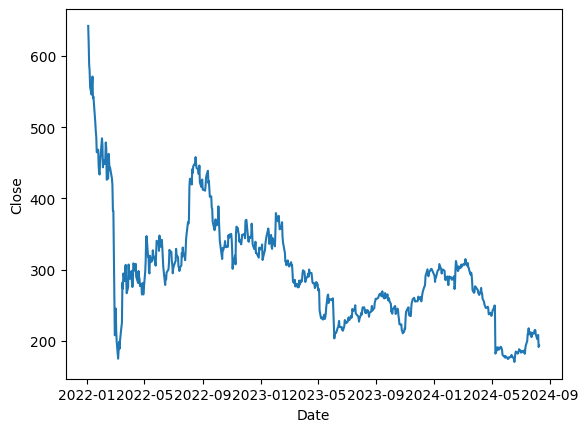

In [132]:
start_date = '2022-01-01'
end_date = datetime.now()
df_detail = yf.download("EPAM", start_date, end_date)
sns.lineplot(df_detail, x='Date', y='Close')

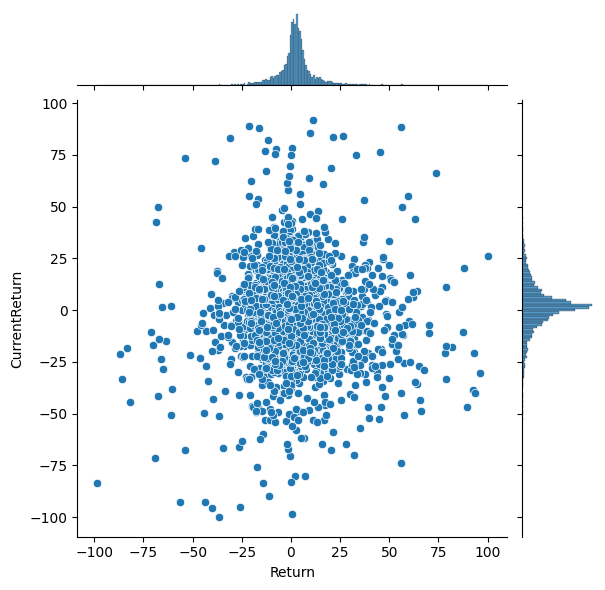

In [ ]:
df4_plot = df4[(df4['Return'] <=100) & (df4['CurrentReturn'] <=100) & (df4['Date'] =='2024-06-03')]
#sns.scatterplot(df4_plot, x='Return', y='CurrentReturn')
sns.jointplot(df4_plot, x='Return', y='CurrentReturn', kind='scatter')

In [131]:
df4[df4['Ticker']=='EPAM']

,Date,Ticker,Close,PClose,Return,CurrentClose,CurrentReturn,Symbol,Security Name
49273,2022-01-03,EPAM,642.200012,NaN,NaN,214.940002,-66.530676,EPAM,"EPAM Systems, Inc. Common Stock"
49274,2022-02-01,EPAM,484.359985,642.200012,-24.578017,214.940002,-55.623914,EPAM,"EPAM Systems, Inc. Common Stock"
49275,2022-03-01,EPAM,211.210007,484.359985,-56.394002,214.940002,1.766013,EPAM,"EPAM Systems, Inc. Common Stock"
49276,2022-04-01,EPAM,287.040009,211.210007,35.902656,214.940002,-25.118452,EPAM,"EPAM Systems, Inc. Common Stock"
49277,2022-05-02,EPAM,288.500000,287.040009,0.508637,214.940002,-25.497400,EPAM,"EPAM Systems, Inc. Common Stock"
49278,2022-06-01,EPAM,326.279999,288.500000,13.095320,214.940002,-34.124064,EPAM,"EPAM Systems, Inc. Common Stock"
49279,2022-07-01,EPAM,302.119995,326.279999,-7.404684,214.940002,-28.856082,EPAM,"EPAM Systems, Inc. Common Stock"
49280,2022-08-01,EPAM,366.420013,302.119995,21.282940,214.940002,-41.340540,EPAM,"EPAM Systems, Inc. Common Stock"
49281,2022-09-01,EPAM,412.209991,366.420013,12.496582,214.940002,-47.856673,EPAM,"EPAM Systems, Inc. Common Stock"
49282,2022-10-03,EPAM,363.579987,412.209991,-11.797386,214.940002,-40.882334,EPAM,"EPAM Systems, Inc. Common Stock"


In [149]:
df5 = df4.sort_values(by=['Ticker', 'Date'])
df5['Return-3'] = df5.groupby('Ticker')['Close'].shift(3)
df5['Return-2'] = df5.groupby('Ticker')['Close'].shift(2)
df5['Return-1'] = df5.groupby('Ticker')['Close'].shift(1).fillna(df5['Close'])
df5['Return+1'] = df5.groupby('Ticker')['Close'].shift(-1).fillna(df5['Close'])
df5['Return+3'] = df5.groupby('Ticker')['Close'].shift(-3).fillna(df5['Return+1'])
df5['Return+6'] = df5.groupby('Ticker')['Close'].shift(-6).fillna(df5['Return+3'])
df5['Return+12'] = df5.groupby('Ticker')['Close'].shift(-12).fillna(df5['Return+6'])
df5['Return-2'] = df5['Return-2'].fillna(df5['Return-1'])
df5['Return-3'] = df5['Return-3'].fillna(df5['Return-2'])

#df5['Return-3'] = (df5['Close'] - df5['Return-3'])*100/df5['Close']
#df5['Return-2'] = (df5['Close'] - df5['Return-2'])*100/df5['Close']
#df5['Return-1'] = (df5['Close'] - df5['Return-1'])*100/df5['Close']
#df5['Return+1'] = (df5['Return+1'] - df5['Close'])*100/df5['Close']
#df5['Return+3'] = (df5['Return+3'] - df5['Close'])*100/df5['Close']
#df5['Return+6'] = (df5['Return+6'] - df5['Close'])*100/df5['Close']
#df5['Return+12'] = (df5['Return+12'] - df5['Close'])*100/df5['Close']

df5[df5['Ticker']=='EPAM']

,Date,Ticker,Close,PClose,Return,CurrentClose,CurrentReturn,Symbol,Security Name,Return-3,Return-2,Return-1,Return+1,Return+3,Return+6,Return+12
49273,2022-01-03,EPAM,642.200012,NaN,NaN,214.940002,-66.530676,EPAM,"EPAM Systems, Inc. Common Stock",642.200012,642.200012,642.200012,484.359985,287.040009,302.119995,352.769989
49274,2022-02-01,EPAM,484.359985,642.200012,-24.578017,214.940002,-55.623914,EPAM,"EPAM Systems, Inc. Common Stock",642.200012,642.200012,642.200012,211.210007,288.500000,366.420013,305.589996
49275,2022-03-01,EPAM,211.210007,484.359985,-56.394002,214.940002,1.766013,EPAM,"EPAM Systems, Inc. Common Stock",642.200012,642.200012,484.359985,287.040009,326.279999,412.209991,297.220001
49276,2022-04-01,EPAM,287.040009,211.210007,35.902656,214.940002,-25.118452,EPAM,"EPAM Systems, Inc. Common Stock",642.200012,484.359985,211.210007,288.500000,302.119995,363.579987,279.010010
49277,2022-05-02,EPAM,288.500000,287.040009,0.508637,214.940002,-25.497400,EPAM,"EPAM Systems, Inc. Common Stock",484.359985,211.210007,287.040009,326.279999,366.420013,342.239990,257.940002
49278,2022-06-01,EPAM,326.279999,288.500000,13.095320,214.940002,-34.124064,EPAM,"EPAM Systems, Inc. Common Stock",211.210007,287.040009,288.500000,302.119995,412.209991,369.600006,226.580002
49279,2022-07-01,EPAM,302.119995,326.279999,-7.404684,214.940002,-28.856082,EPAM,"EPAM Systems, Inc. Common Stock",287.040009,288.500000,326.279999,366.420013,363.579987,352.769989,239.479996
49280,2022-08-01,EPAM,366.420013,302.119995,21.282940,214.940002,-41.340540,EPAM,"EPAM Systems, Inc. Common Stock",288.500000,326.279999,302.119995,412.209991,342.239990,305.589996,258.549988
49281,2022-09-01,EPAM,412.209991,366.420013,12.496582,214.940002,-47.856673,EPAM,"EPAM Systems, Inc. Common Stock",326.279999,302.119995,366.420013,363.579987,369.600006,297.220001,251.839996
49282,2022-10-03,EPAM,363.579987,412.209991,-11.797386,214.940002,-40.882334,EPAM,"EPAM Systems, Inc. Common Stock",302.119995,366.420013,412.209991,342.239990,352.769989,279.010010,216.649994


In [207]:
df6 = df5.dropna(subset=['Return'])
df7=df6.loc[df6.groupby('Ticker')['Return'].idxmin()]
df8=df7[(df7['Close']>= 2) & (df7['Return'] <= -25)].sort_values(by='Return')
print(df8.shape)
#df8.tail(3)

(1272, 16)


In [208]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
scaler = StandardScaler()
df9 = scaler.fit_transform(df8[['Close', 'Return-3','Return-2','Return-1','Return']])

In [209]:
#X = df8[['Close','Return-3','Return-2','Return-1','Return']]
X = pd.DataFrame(df9, columns=['Close','Return-3','Return-2','Return-1','Return'])
y = pd.DataFrame()
y['Target'] = df8['Return+3']

In [210]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(1017, 5)
(255, 5)


In [211]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model = RandomForestRegressor()
model.fit((x_train), np.array(y_train).ravel())
y_train_pred = model.predict((x_train))
y_test_pred = model.predict(x_test)
model_train_r2 = r2_score(y_train, y_train_pred)
model_test_r2 = r2_score(y_test, y_test_pred)
print('train score {0} test score {1}'.format(model_train_r2, model_test_r2))

train score 0.9676374941246273 test score 0.9606161773760196


In [212]:
#display / verify result with invert transform for onehot and scale
y_pred_df = pd.DataFrame(y_test_pred, columns=['Pred_Target'])
x_test_inverse = scaler.inverse_transform(x_test)
x_test_inverse = pd.DataFrame(x_test_inverse, columns=['Close','Return-3','Return-2','Return-1','Return'])

X_test_verify = pd.concat([y_test.reset_index(), y_pred_df , x_test_inverse.reset_index() ], axis=1)
X_test_verify['diff'] = abs(X_test_verify['Target'] - X_test_verify['Pred_Target'])*100/X_test_verify['Target']
print("Ignored Target as 0 for ",len(X_test_verify[X_test_verify['Target'] == 0]))
X_test_verify[X_test_verify['Target'] != 0].sort_values('diff', ascending=False).tail(100)

Ignored Target as 0 for  0


,index,Target,Pred_Target,index,Close,Return-3,Return-2,Return-1,Return,diff
89,57570,18.580000,21.247300,89,20.540001,26.260000,27.440001,27.389999,-25.009122,14.355758
150,10427,12.840000,11.000500,150,10.080000,15.600000,20.639999,16.559999,-39.130433,14.326325
15,10489,88.139999,76.029400,15,72.830002,121.750000,123.500000,113.209999,-35.668225,13.740185
11,9425,36.380001,41.362401,11,35.759998,50.759998,47.500000,48.029999,-25.546535,13.695436
180,54598,15.570000,17.695500,180,15.280000,26.500000,24.900000,23.730000,-35.608934,13.651255
...,...,...,...,...,...,...,...,...,...,...
131,105856,2.170000,2.155250,131,2.040000,5.370000,3.770000,2.970000,-31.313133,0.679728
181,78597,34.540001,34.312400,181,35.320000,51.360001,52.750000,50.369999,-29.878895,0.658948
136,26709,10.280000,10.339900,136,10.490000,13.570000,13.590000,14.020000,-25.178321,0.582688
99,165649,18.410000,18.478700,99,18.040001,32.389999,28.670000,26.600000,-32.180449,0.373167


<Axes: xlabel='diff', ylabel='Density'>

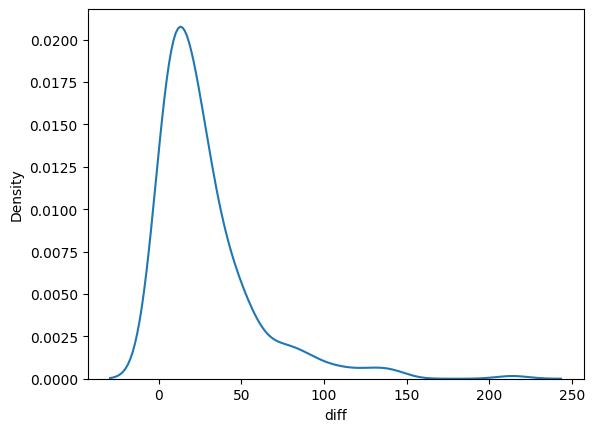

In [223]:
df_plot= X_test_verify[X_test_verify['diff']<250]
#sns_plot = sns.kdeplot(df_plot['diff'], bw_adjust=0.5)
mean_diff_by_return = df_plot.groupby('Return')['diff'].sum()
mean_diff_by_return
sns.kdeplot(data=mean_diff_by_return )
#for return_value, mean_diff in mean_diff_by_return.items():
#    plt.axvline(x=mean_diff, color='red', linestyle='--')
#    plt.text(mean_diff, 0.02, f'Mean {return_value}', rotation=90, verticalalignment='bottom')


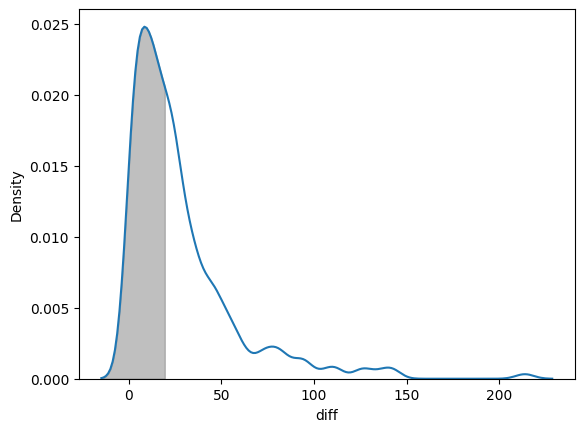

In [214]:
df_plot= X_test_verify[X_test_verify['diff']<250]
sns_plot = sns.kdeplot(df_plot['diff'] , bw_adjust=0.5)

x_values = sns_plot.lines[0].get_xdata()
y_values = sns_plot.lines[0].get_ydata()
plt.fill_between(x_values, 0, y_values, where=(x_values >= -20) & (x_values <= 20),
                 color='grey', alpha=0.5)

In [146]:
# Models
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [147]:
models={'Linear Regression': LinearRegression()
        ,'Ridge': Ridge()
        ,'Lasso': Lasso()
        ,'NeighborsRegressor': KNeighborsRegressor()
        ,'Decision Tree': DecisionTreeRegressor()
        ,'Random Forest':RandomForestRegressor()
        ,'SVR':SVR()
        ,'AdaBoost Regressor': AdaBoostRegressor()
        }

model_params={
                "Linear Regression":{}
            }

In [148]:
from datetime import datetime
model_score=[]

for i in models:
  print('################################################', datetime.now())
  print(models.get(i), model_params.get(i, {}))
  ms = GridSearchCV(models.get(i) ,model_params.get(i, {})  ,cv=3)
  #ms = RandomizedSearchCV(models.get(i) ,model_params.get(i, {})  ,cv=3, random_state=42)
  ms.fit((x_train), np.array(y_train).ravel())
  print(ms.best_params_)

  model = models.get(i)
  model.set_params(**ms.best_params_)
  model.fit(x_train, np.array(y_train).ravel())
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  model_train_r2 = r2_score(y_train, y_train_pred)
  model_test_r2 = r2_score(y_test, y_test_pred)
  model_score.append({
    'Model': str(model),
    'R² Train': r2_score(y_train, y_train_pred),
    'R2 Test':r2_score(y_test, y_test_pred),
    'MSE Train': mean_squared_error(y_train, y_train_pred),
    'MSE Test': mean_squared_error(y_test, y_test_pred),
    'RMSE Train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'RMSE Test': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'MAETrain': mean_absolute_error(y_train, y_train_pred),
    'MAE Test': mean_absolute_error(y_test, y_test_pred)
  })
  print('train score {0} | test score {1}'.format(model_train_r2, model_test_r2))
pd.DataFrame(model_score).sort_values('R2 Test',ascending=False)

################################################ 2024-08-09 23:18:08.255848
LinearRegression() {}
{}
train score 0.054657718212833495 | test score -0.021240532450897298
################################################ 2024-08-09 23:18:08.296398
Ridge() {}
{}
train score 0.05465733118147231 | test score -0.021208401892693463
################################################ 2024-08-09 23:18:08.334098
Lasso() {}
{}
train score 0.04979523829196553 | test score -0.014287336548649776
################################################ 2024-08-09 23:18:08.379490
KNeighborsRegressor() {}
{}
train score 0.23584277905618078 | test score -0.004462293964293984
################################################ 2024-08-09 23:18:08.429640
DecisionTreeRegressor() {}
{}
train score 1.0 | test score -0.5968561589501993
################################################ 2024-08-09 23:18:08.499174
RandomForestRegressor() {}
{}
train score 0.8463773193446089 | test score -0.016211404175096478
###################

,Model,R² Train,R2 Test,MSE Train,MSE Test,RMSE Train,RMSE Test,MAETrain,MAE Test
7,AdaBoostRegressor(),0.136612,0.010264,860.411525,1250.979162,29.332772,35.369184,22.753612,25.329039
3,KNeighborsRegressor(),0.235843,-0.004462,761.522588,1269.592166,27.595699,35.631337,20.116811,24.905161
2,Lasso(),0.049795,-0.014287,946.928680,1282.010548,30.772206,35.805175,22.400878,24.615646
5,RandomForestRegressor(),0.846377,-0.016211,153.093026,1284.442478,12.373077,35.839119,8.887814,25.068311
6,SVR(),0.027861,-0.016758,968.786801,1285.133627,31.125340,35.848760,22.283942,24.258485
1,Ridge(),0.054657,-0.021208,942.083351,1290.758443,30.693376,35.927127,22.368971,24.671512
0,LinearRegression(),0.054658,-0.021241,942.082965,1290.799055,30.693370,35.927692,22.369162,24.672164
4,DecisionTreeRegressor(),1.000000,-0.596856,0.000000,2018.349600,0.000000,44.926046,0.000000,32.023541
